# Projet appartment-hunter - La plateforme

## Project Introduction

Développement d'un outil visant à estimer la valeur de biens immobiliers à partir des charactéristiques d'un lot.

## Roadmap for appartment-hunter project

**A voir sur le github svp**
### Infos
#### Project members :
Julien Ract-Mugnerot
Pierre-Alexis Lebair

#### Used computers :
Asus Zenbook Duo


### Steps
1. find friends
- find friends 2y
2. data
- fetch data 5mn
- first data observation 30mn
- Choose a csv : 15mn
3. roadmap
- Create a roadamap 45mn
4. ressources management
- Create Github 15mn
- Create Trello 15mn
- Share Tasks 1h
5. Preprocessing
- Project Introduction 10mn
- Complete Data Exploration w/ visualisation 4h
- Data Cleaning  2h (Duplicates, Outliers, Scaling eventually ...)
- find imputations solutions 1h

6. Exploratory Power BI Analysis
- Idk 4h
- Pdf export 15mn

7. Stay up to date with technology - Regression
**Inside Readme**
**Use IMGS**
- def regression algorythm 15mn
- def model 1 10mn
- def model 2 10mn
- def model 3 10mn

8. Feature Analysis and Selection
- Explore options (Boruta, forward feature selection, ...) 1h
- feature Analysis 45mn
- Feature Selection 30mn

9. Train 3 models and evaluate their performance

- train model 1 10mn
- train model 2 10mn
- train model 3 10mn

10. Grid search

- Grid Search 2h
- Result interpretation 20mn
- Model Final 1h
- Project's conclusion

11. Flask
- Create basic Flask App 1h
- Add random appart to App 30mn

12. Docker Script
- Docker 1h15



100. Project Delivery
- Create Readme 1mn
- Create Notebook 1mn
- Make presentation 4h
**


- Make basic App 1h
- Add random appart to App 30mn


- Maintain Readme 3h
- Maintain requirements.txt 10mn


101. Extra

Do presentation in reveal.js 12h
Export Docker To aws 3h


## Imports

In [1]:
# !pip install missingno

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, learning_curve, validation_curve, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import joblib

import lime
import lime.lime_tabular

from functions import load_best_model, save_model_if_best, iqr_range_price_filter,\
    variance_threshold_selector, KBest_selector


# import os

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns
# import lime
# import lime.lime_tabular

# import missingno as msno
# from scipy.stats import f_oneway, chi2_contingency

# from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, cross_val_score
# from sklearn.compose import ColumnTransformer



# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

# from sklearn import metrics



# import pickle

# import warnings



# warnings.simplefilter(action='ignore', category=FutureWarning)

# pd.options.mode.chained_assignment = None
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

### Palette

In [5]:

orange = "#FFA500"
purple = "#800080"
grey = "#808080"

custom_palette = ["#FFA500", "#FF8C00", "#FF5500", "#FF2200", "#800040", "#400080", "#800080", "#808080", "#808080"]

custom_palette_f5 = [
    purple   ,  # purple
    '#3B528B',  # Blue
    orange   ,  #orange
    '#21918C',  # Green
    # '#5DC863',  # Yellow-Green
    grey     ,  #grey
    # '#FDE725'   # Yellow
]

viridis_colors = [
    purple   ,  # Purple
    '#3B528B',  # Blue
    '#21918C',  # Green
    '#5DC863',  # Yellow-Green
    '#FDE725'   # Yellow
]

sns.set_palette(custom_palette)


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
full_df = pd.read_csv('data/houses_Madrid.csv')
small_df = pd.read_csv('data/kc_house_data.csv')

## Data Exploration

In [8]:
full_df.head(1)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False


In [9]:
full_df.shape

(21742, 58)

In [10]:
small_df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [11]:
small_df.shape

(21613, 21)

We already observe a difference in features amount between the two datasets available, and that the df with the lesser number of features isn't necessary better with already pre-treated data. So we got a preference for now but we got to dig further  to verify that the bigger dataset does not have too many unusable features, and is worth using over the first one.

### Deciding between the two datasets

#### Exploring the smaller dataset

In [12]:
small_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
small_df.duplicated().sum()

0

We take a first look at the features availables throught their types.

In [14]:
small_df.dtypes.value_counts().index

Index([int64, float64, object], dtype='object')

In [15]:
small_df.select_dtypes(include=['object']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB


In [16]:
small_df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  int64
 1   bedrooms       21613 non-null  int64
 2   sqft_living    21613 non-null  int64
 3   sqft_lot       21613 non-null  int64
 4   waterfront     21613 non-null  int64
 5   view           21613 non-null  int64
 6   condition      21613 non-null  int64
 7   grade          21613 non-null  int64
 8   sqft_above     21613 non-null  int64
 9   sqft_basement  21613 non-null  int64
 10  yr_built       21613 non-null  int64
 11  yr_renovated   21613 non-null  int64
 12  zipcode        21613 non-null  int64
 13  sqft_living15  21613 non-null  int64
 14  sqft_lot15     21613 non-null  int64
dtypes: int64(15)
memory usage: 2.5 MB


In [17]:
small_df.select_dtypes(include=['int64']).info('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  int64
 1   bedrooms       21613 non-null  int64
 2   sqft_living    21613 non-null  int64
 3   sqft_lot       21613 non-null  int64
 4   waterfront     21613 non-null  int64
 5   view           21613 non-null  int64
 6   condition      21613 non-null  int64
 7   grade          21613 non-null  int64
 8   sqft_above     21613 non-null  int64
 9   sqft_basement  21613 non-null  int64
 10  yr_built       21613 non-null  int64
 11  yr_renovated   21613 non-null  int64
 12  zipcode        21613 non-null  int64
 13  sqft_living15  21613 non-null  int64
 14  sqft_lot15     21613 non-null  int64
dtypes: int64(15)
memory usage: 2.5 MB


In [18]:
full_df['buy_price'].isna().sum()

0

In [19]:
percentage_missing = small_df.isnull().sum().sort_values(ascending = False)/small_df.shape[0]*100
print(f"{percentage_missing[percentage_missing<30].count()} beneficial features")
percentage_missing[percentage_missing<30]

21 beneficial features


id               0.0
grade            0.0
sqft_living15    0.0
long             0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64

We observe that amongst all 21 features of the dataset none of them are missing any value, this could indicate a high data quality, this will certainly be the deciding factor in choosing a dataset

#### Exploring the dataset with the most features

In [20]:
full_df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,portal,door,rent_price,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,0.0,0.0,2.174200e+04,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,NaN,NaN,-5.917031e+04,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,NaN,NaN,9.171162e+05,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,-3.459028e+07,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,7.250000e+02,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,NaN,NaN,1.116000e+03,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,NaN,NaN,1.687000e+03,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,NaN,NaN,2.517000e+03,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


In [21]:
full_df.duplicated().sum()

0

We take a first look at the features availables throught their types.

In [22]:
full_df.dtypes.value_counts().index

Index([object, float64, int64, bool], dtype='object')

In [23]:
full_df.select_dtypes(include=['int64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         21742 non-null  int64
 1   id                 21742 non-null  int64
 2   n_rooms            21742 non-null  int64
 3   rent_price         21742 non-null  int64
 4   buy_price          21742 non-null  int64
 5   buy_price_by_area  21742 non-null  int64
dtypes: int64(6)
memory usage: 1019.3 KB


In [24]:
full_df.select_dtypes(include=['O']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         21742 non-null  object
 1   subtitle                      21742 non-null  object
 2   raw_address                   16277 non-null  object
 3   street_name                   15837 non-null  object
 4   street_number                 6300 non-null   object
 5   floor                         19135 non-null  object
 6   is_floor_under                20572 non-null  object
 7   neighborhood_id               21742 non-null  object
 8   operation                     21742 non-null  object
 9   house_type_id                 21351 non-null  object
 10  is_new_development            20750 non-null  object
 11  has_central_heating           13608 non-null  object
 12  has_individual_heating        13608 non-null  object
 13  has_ac          

In [25]:
full_df.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sq_mt_built          21616 non-null  float64
 1   sq_mt_useful         8228 non-null   float64
 2   n_bathrooms          21726 non-null  float64
 3   n_floors             1437 non-null   float64
 4   sq_mt_allotment      1432 non-null   float64
 5   latitude             0 non-null      float64
 6   longitude            0 non-null      float64
 7   portal               0 non-null      float64
 8   door                 0 non-null      float64
 9   rent_price_by_area   0 non-null      float64
 10  built_year           10000 non-null  float64
 11  are_pets_allowed     0 non-null      float64
 12  is_furnished         0 non-null      float64
 13  is_kitchen_equipped  0 non-null      float64
 14  has_private_parking  0 non-null      float64
 15  has_public_parking   0 non-null     

In [26]:
full_df.select_dtypes(include=['bool']).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   is_exact_address_hidden  21742 non-null  bool 
 1   is_rent_price_known      21742 non-null  bool 
 2   is_buy_price_known       21742 non-null  bool 
 3   is_renewal_needed        21742 non-null  bool 
 4   has_parking              21742 non-null  bool 
dtypes: bool(5)
memory usage: 106.3 KB


Using msno to get the per feature count of values for the bigger dataset

<Axes: >

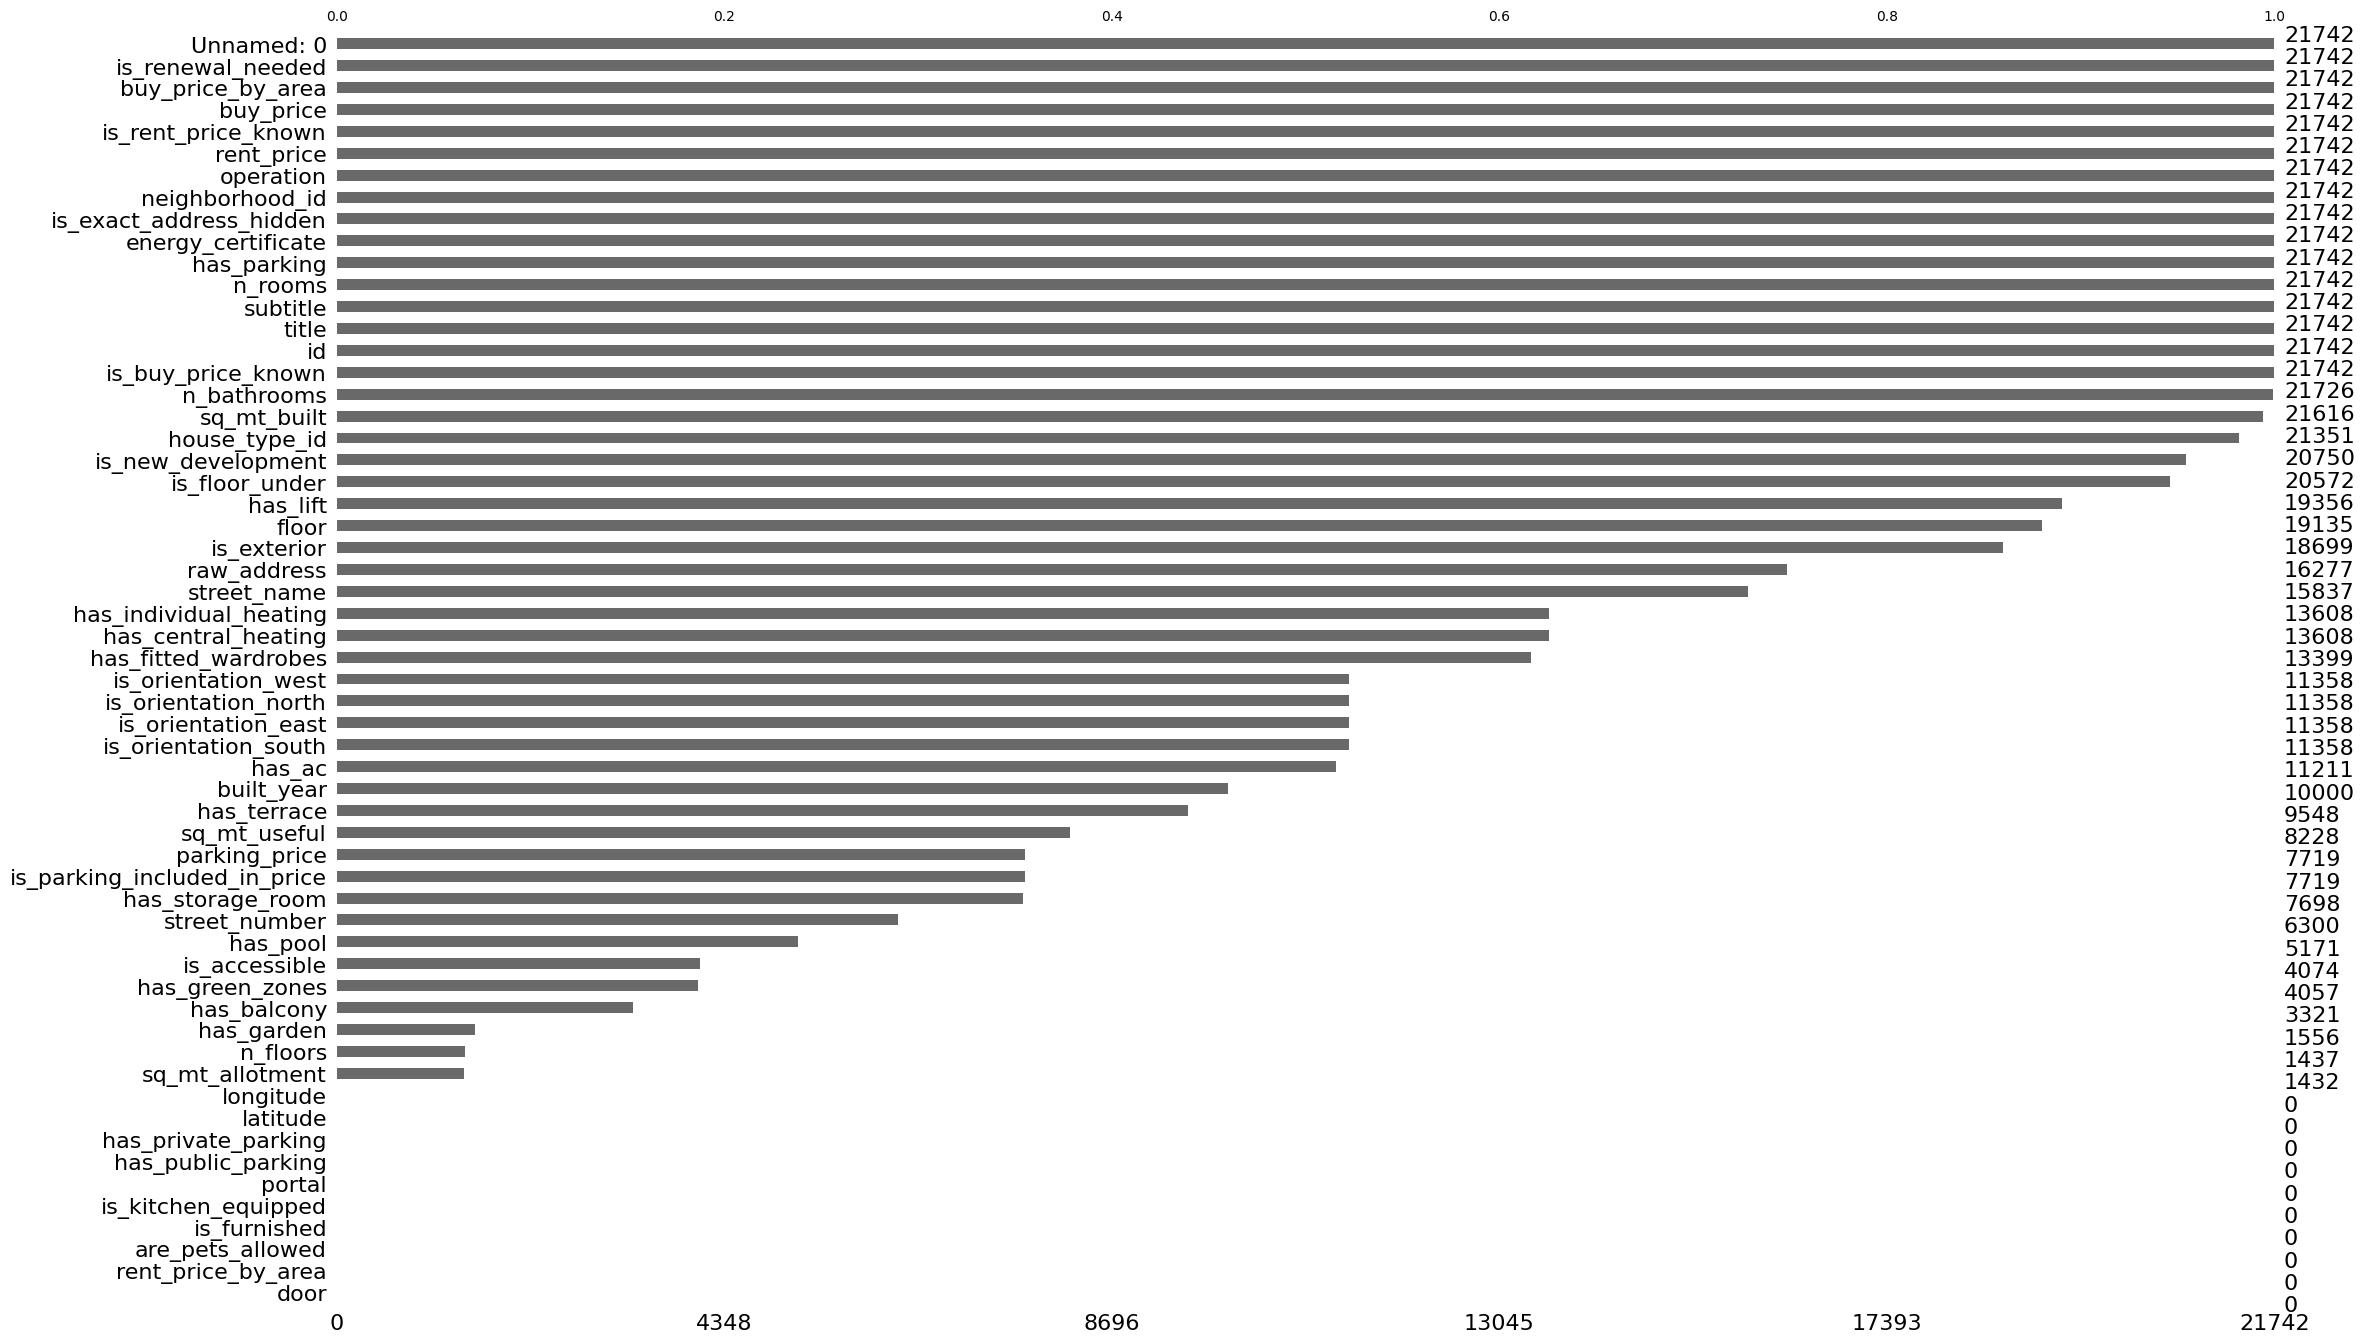

In [27]:
msno.bar(full_df, sort='ascending')

In [28]:
percentage_missing = full_df.isnull().sum().sort_values(ascending = False)/21742*100
print(f"{percentage_missing[percentage_missing<30].count()} valeurs exploitables")
percentage_missing[percentage_missing<30]

26 valeurs exploitables


street_name                27.159415
raw_address                25.135682
is_exterior                13.995953
floor                      11.990617
has_lift                   10.974151
is_floor_under              5.381290
is_new_development          4.562598
house_type_id               1.798363
sq_mt_built                 0.579524
n_bathrooms                 0.073590
energy_certificate          0.000000
has_parking                 0.000000
Unnamed: 0                  0.000000
id                          0.000000
is_buy_price_known          0.000000
buy_price_by_area           0.000000
buy_price                   0.000000
is_rent_price_known         0.000000
rent_price                  0.000000
operation                   0.000000
neighborhood_id             0.000000
is_exact_address_hidden     0.000000
n_rooms                     0.000000
subtitle                    0.000000
title                       0.000000
is_renewal_needed           0.000000
dtype: float64

In [29]:
percentage_missing

has_private_parking             100.000000
door                            100.000000
portal                          100.000000
is_furnished                    100.000000
rent_price_by_area              100.000000
longitude                       100.000000
latitude                        100.000000
has_public_parking              100.000000
is_kitchen_equipped             100.000000
are_pets_allowed                100.000000
sq_mt_allotment                  93.413669
n_floors                         93.390672
has_garden                       92.843345
has_balcony                      84.725416
has_green_zones                  81.340263
is_accessible                    81.262073
has_pool                         76.216539
street_number                    71.023825
has_storage_room                 64.593874
parking_price                    64.497286
is_parking_included_in_price     64.497286
sq_mt_useful                     62.156195
has_terrace                      56.084997
built_year 

We observe that amongst all 58 features of the dataset,  more than half of it (32) are missing 30% or more of their values.
Some of The remaining 26 features aren't necessarily relevant for a ML use case either like for exemple 'Unnamed: 0, street_name'

We could assume boolean vars with many missing values like has_pool or has_garden with only True values in it would be usable but it doesn't make sense to us that only 8% or these houses would have a garden while as many as 23.8% of houses would have a pool, so our confidence level on this dataset is running low.

Even the data description is of the lesser quality.
this probably indicate a lesser data quality, and at the same time not having access to values that appears to be relevant like 'buy_price_by_area' and 'parking_price' would be unfortunate.

#### Making a decision

While some features could matters a lot for our models, many uncertaintaies remain over the bigger dataset (full_df), as for exemple having more houses with pools than gardens, a lot of unexploitable features and some basic informations like the lot condition being missing.

While the smaller dataset(small_df) has no obvious missing values, classics but relevant features and has a very high trust index. 

So we will be choosing small_df over those previously mentionned reason.

### Single feature analysis

In [30]:
df = small_df

<!-- Lists of columns that appears to be fine without data cleaning :
- price -->

We'll be cleaning the Dataframe throught non categorical and non numerical features first with Id and date

Analys

#### Id

In [31]:
df[df['id'].duplicated(keep=False)].id.count()

353

In [32]:
print(f"{df[df['id'].duplicated(keep=False)].id.count()/21436*100}% of the dataset id values are duplicates (all duplicated lines included)")

1.6467624556820302% of the dataset id values are duplicates (all duplicated lines included)


In [33]:
# We
df[df['id'].duplicated(keep=False)].sort_values(by="id").iloc[20:46, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15300,705730280,20150421T000000,335000.0,3,2.50,1740,5267,2.0,0,0,3,7,1740,0,1999,0,98038,47.3777,-122.023,2180,5000
15299,705730280,20140819T000000,325000.0,3,2.50,1740,5267,2.0,0,0,3,7,1740,0,1999,0,98038,47.3777,-122.023,2180,5000
9275,722039087,20140923T000000,220500.0,2,1.00,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442
9276,722039087,20150504T000000,329000.0,2,1.00,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442
3785,723049156,20140523T000000,149000.0,3,1.00,1700,8645,1.0,0,0,3,6,1700,0,1955,0,98146,47.4899,-122.337,1500,7980
3786,723049156,20141112T000000,284700.0,3,1.00,1700,8645,1.0,0,0,3,6,1700,0,1955,0,98146,47.4899,-122.337,1500,7980
823,726049190,20141002T000000,287500.0,3,1.00,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
824,726049190,20150218T000000,431000.0,3,1.00,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
17602,795000620,20140924T000000,115000.0,3,1.00,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.330,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.00,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.330,1070,6250


We notice that those duplicates have the same values over other features like bedroom, condition, grade, but **the price** and **date** of the sell is always different, some of them suddenly dropping in value by more than half their price and some even increasing in value by twice or thrice their first listed sell price.

Those irregularities leads me to consider 4 possibilities :
- House has been bought and resold at the same agency by their new owner at differents times, but those "false duplicates" entries **always follow each others** in the dataset which is pretty curious when you consider values of the dataset have not been entered in a chronological order like it would most likely be the case in an archive
- Those are typing/software errors, which is pretty unlikely considering the whole dataset seems pretty clean.
- Those lot sells have been cancelled, and then resold at a later date. Which could be a decent option by process of elimination.

- **The agency when acquiring a lot, sometimes asks for acquisition document of the property, which gives them an additional entry in the dataframe, and the previous features of the dataset like the number of bathrooms are not known/asked from the previous sell, which would explain why none of the others values ever change except for the data and the price of the lots.**

The last option makes the most sense to us, since it fits the modus operandi of entering consecutively sells information of a same lot at a different date for a different price while ocasionally having very wide price gaps.

those seems to be legits sells, but modelling will have to be tested with and without those values. Dropping the first one and keeping the last entry would be the better option to avoid having the model making a potentially false correlation with the date variable, while changes over other features have not been tracked between the multiple sells and could explain the price evolution.

In [34]:
df = df[~df.duplicated(subset=['id'], keep='last')]


In [35]:
df[df.id== 1217000340]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12435,1217000340,20150219T000000,340000.0,3,1.0,1840,8100,1.0,0,0,4,7,920,920,1953,0,98166,47.455,-122.35,1250,8100


#### date

This will most likely be a determining feature, so we will transform it to an exploitable format.


In [36]:
df.date.dtypes

dtype('O')

In [37]:
df.loc[:, 'date'] = df['date'].apply(lambda x: x[:8])

In [38]:
df.loc[:, 'date']  = pd.to_datetime(df['date'], format='%Y%m%d')

In [39]:
df.date[0]

Timestamp('2014-10-13 00:00:00')

We'll now be cleaning numerical values

#### sqft_living

Text(0.5, 1.0, 'Distribution of sqft_living')

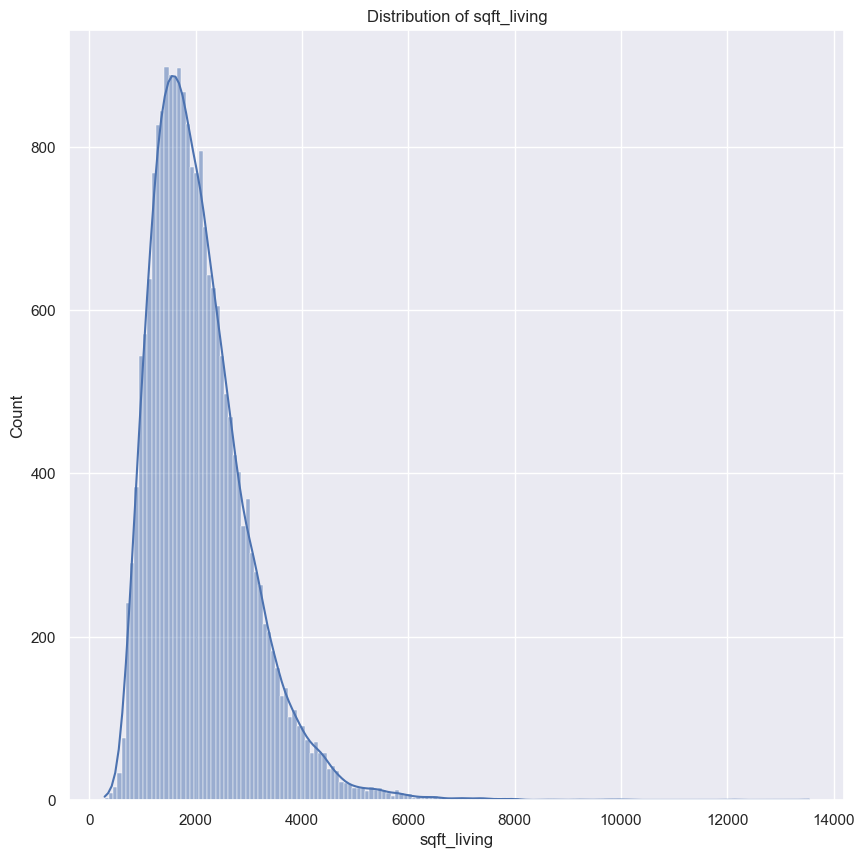

In [40]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(10, 10))
sns.histplot(df["sqft_living"], label="sqft_living", kde=True)
plt.title("Distribution of sqft_living")

In [41]:
df.sqft_living[df.sqft_living > 5800].count()

85

In [42]:
df = df[df.sqft_living <= 5800]

We do realize a direct relation sqft_lot = sqft_above + sqft_basement.
We expect the VIF multicolinearity test to give us additional information to make a well informed decision in due time.

In [164]:
df[['sqft_living', 'sqft_above', 'sqft_basement']].head(5)

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0
1,2570,2170,400
2,770,770,0
3,1960,1050,910
4,1680,1680,0


#### sqft_lot

In [43]:
df[df["sqft_lot"] < 1500000].count()

id               21350
date             21350
price            21350
bedrooms         21350
bathrooms        21350
sqft_living      21350
sqft_lot         21350
floors           21350
waterfront       21350
view             21350
condition        21350
grade            21350
sqft_above       21350
sqft_basement    21350
yr_built         21350
yr_renovated     21350
zipcode          21350
lat              21350
long             21350
sqft_living15    21350
sqft_lot15       21350
dtype: int64

In [44]:
df = df[df["sqft_lot"] < 1500000]

Text(0.5, 1.0, 'Distribution of sqft_lot')

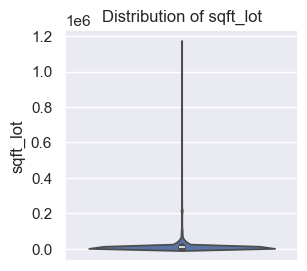

In [45]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(3, 3))
sns.violinplot(df["sqft_lot"])
plt.title("Distribution of sqft_lot")

We realize the distribution of this column is pretty unbalanced, we're taking a look at it's properties before deciding how to visualize and treat it

In [46]:
df.sqft_lot.describe()

count    2.135000e+04
mean     1.484079e+04
std      3.927584e+04
min      5.200000e+02
25%      5.031250e+03
50%      7.594500e+03
75%      1.060875e+04
max      1.164794e+06
Name: sqft_lot, dtype: float64

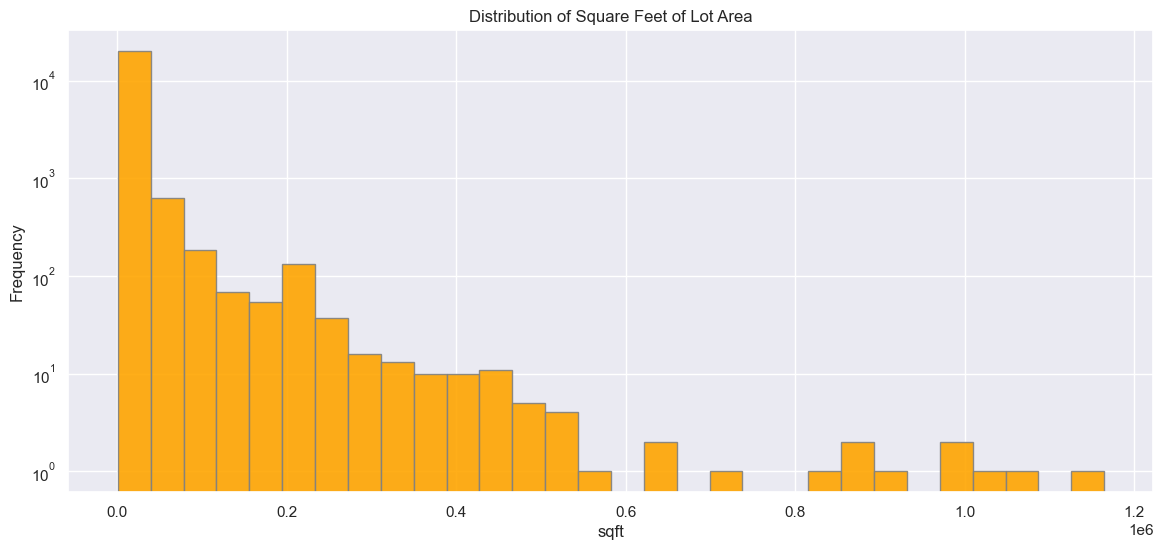

In [47]:

plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=30, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('sqft')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Square Feet of Lot Area')

plt.show()

We take a look at the max values of this feature, to see if there is sense in keeping a number of them.

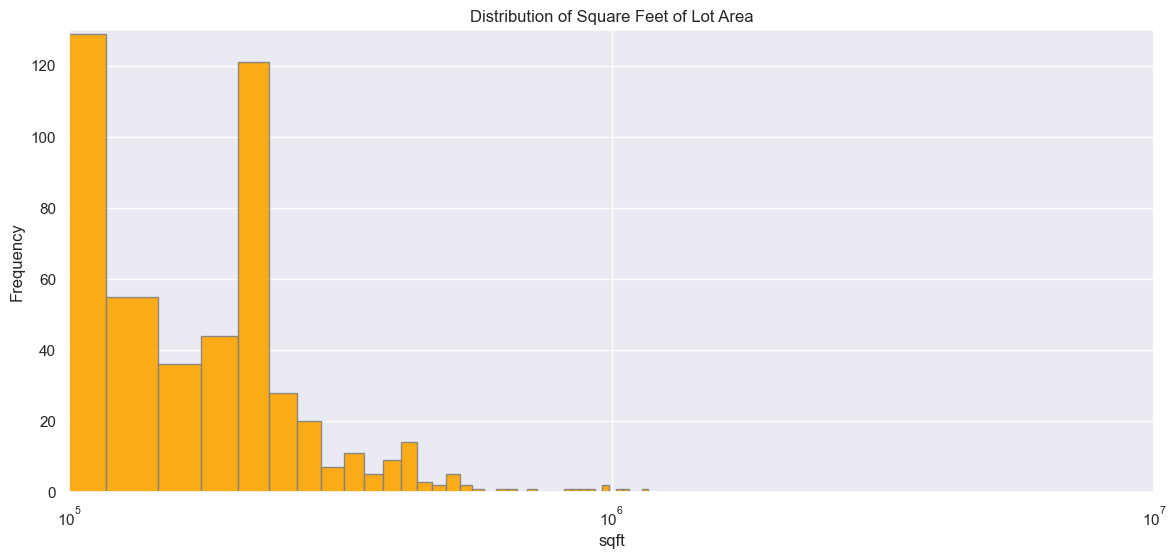

In [48]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=40, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('sqft')
plt.xscale('symlog')
plt.xlim(1e5, 1e7)

plt.ylabel('Frequency')
plt.yscale('linear')
plt.ylim(0, 130)

plt.title('Distribution of Square Feet of Lot Area')

plt.show()


Quick reminder, scale on 100k to 10M

In [49]:
df.sqft_lot[df['sqft_lot'] > 10**5.5].count()

64

We choose to only drop extreme outliers above 550k

In [50]:
df = df[df['sqft_lot'] <= 10**5.5]

#### bedrooms

In [51]:
df.bedrooms.value_counts().sort_values(ascending=False)

bedrooms
3     9703
4     6800
2     2723
5     1545
6      252
1      193
7       34
0       13
8       12
9        6
10       3
11       1
33       1
Name: count, dtype: int64

We choose to drop the one extreme outlier which is thrice the value of the second highest value, this will help for a proper visualisation of the bedroom feature but not only.
Having 0 bathrooms and over 6 appears to be way too uncommon to be worth having classes.

In [52]:
df = df[(df.bedrooms > 0) & (df.bedrooms < 7)]

In [53]:
df.bedrooms.isna().sum()

0

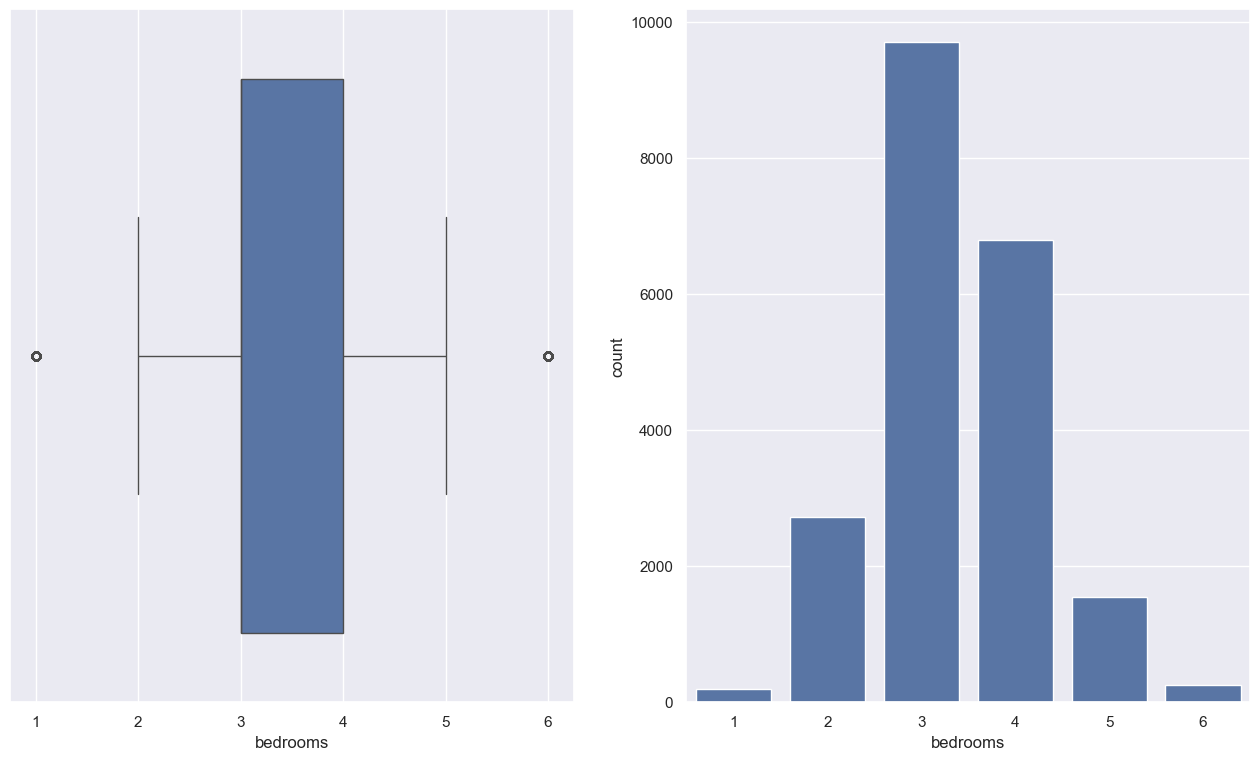

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
sns.boxplot(x='bedrooms', data=df, ax=axs[0])
sns.countplot(x='bedrooms', data=df, ax=axs[1])
plt.show()

0 is not that surprising of a value since a lot can be only one room, with kitchen and lounge integrated in one. It sounds reasonable to keeps those small outliers, that are decently scaled around the central distribution.

#### bathrooms

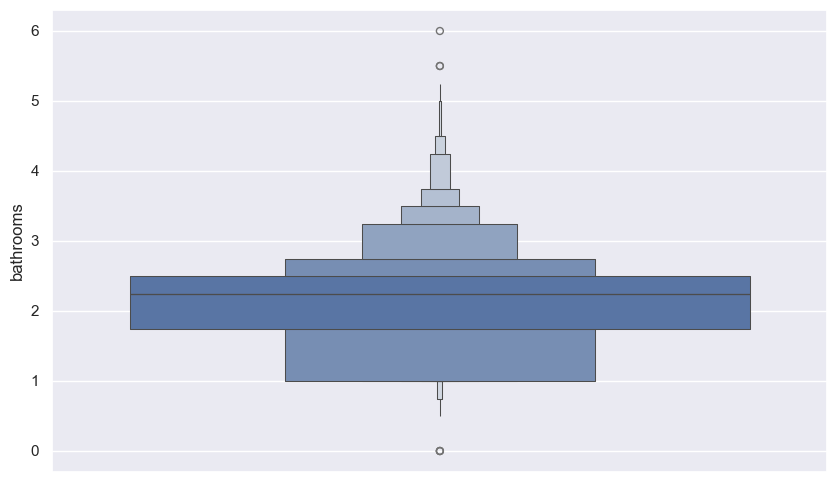

In [55]:
df.bathrooms.value_counts()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='bathrooms')
plt.show()

In [56]:
df.bathrooms[df.bathrooms < 1].count()

77

In [57]:
df.bathrooms[df.bathrooms > 5].count()

10

We are dropping above 5 bathrooms to eliminate a part of the outliers without reducing the dataset too much.

In [58]:
df = df[df.bathrooms <= 5]

Later on after finishing the preprocessing, some values become way too rarely seen(under 10 each), we are disposing of them.

In [59]:
df = df[(df.bathrooms != 0.00) & (df.bathrooms != 4.75) & (df.bathrooms != 0.50) & (df.bathrooms != 5.00) & (df.bathrooms != 1.25)]

#### floors

In [60]:
df.floors.value_counts()

floors
1.0    10499
2.0     8043
1.5     1863
3.0      601
2.5      148
3.5        6
Name: count, dtype: int64

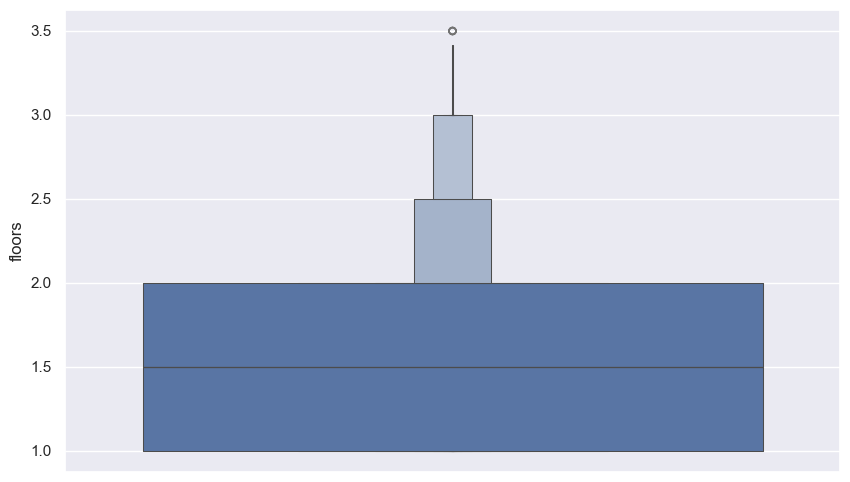

In [61]:
df.floors.value_counts()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='floors')
plt.show()

if we can avoid having a new class being created on a most likely very important feature for a mere 7 values, it's better to discard them and it will save computational ressources.

In [62]:
df[df.floors >= 3.5].count()

id               6
date             6
price            6
bedrooms         6
bathrooms        6
sqft_living      6
sqft_lot         6
floors           6
waterfront       6
view             6
condition        6
grade            6
sqft_above       6
sqft_basement    6
yr_built         6
yr_renovated     6
zipcode          6
lat              6
long             6
sqft_living15    6
sqft_lot15       6
dtype: int64

In [63]:
df = df[df.floors < 3.5]

#### waterfront

In [64]:
df.waterfront.value_counts()

waterfront
0    21004
1      150
Name: count, dtype: int64

In [65]:
df.waterfront.value_counts(normalize = True)

waterfront
0    0.992909
1    0.007091
Name: proportion, dtype: float64

That feature is probably way too unbalanced to be used for machine learning, we are considering dropping it from the dataframe even if it shows promising correlations to preserve some of our precious calculation ressources. 

After all we left our ML job to do this we're broke

Let's briefly study it.

In [66]:
wat_0_df =  df[df.waterfront == 0]
wat_1_df =  df[df.waterfront == 1]

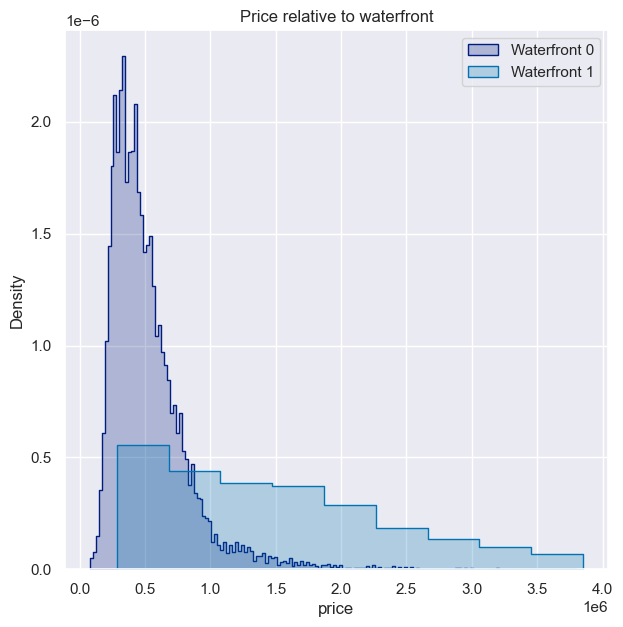

In [67]:

# plt.hist(df.price[df.waterfront == 0], color='brown')
plt.figure(figsize=(7, 7))
sns.histplot(wat_0_df,
             x="price", hue="waterfront",
             element="step",
             stat="density", common_norm=False, legend = True, label='Waterfront 0',
             palette='dark') #dark  colorblind

sns.histplot(wat_1_df,
             x="price", hue="waterfront",
             element="step",
             stat="density", common_norm=False, legend = True, label='Waterfront 1',
             palette='colorblind') #bright6 colorblind dark
plt.title("Price relative to waterfront")
plt.legend()
plt.show()


In [68]:
# wat_1_df.groupby(['price', 'waterfront'])
df.groupby('waterfront')['price'].mean()

waterfront
0    5.236431e+05
1    1.488637e+06
Name: price, dtype: float64

In [69]:
# df.drop(columns ='waterfront', inplace=True)

We recluantly keep it for now.

#### view

In [70]:
df.view.value_counts(normalize = True)

view
0    0.904652
2    0.043680
3    0.022596
1    0.015269
4    0.013804
Name: proportion, dtype: float64

In [71]:
df.groupby('view')['price'].mean()

view
0    4.923910e+05
1    7.926261e+05
2    7.612084e+05
3    9.355488e+05
4    1.343978e+06
Name: price, dtype: float64

This feature doesn't need any cleaning from our first impression

#### condition

In [72]:
df.groupby('condition')['price'].mean().values

array([349480.35714286, 334899.30625   , 531149.34962077, 513235.71853178,
       604544.07789095])

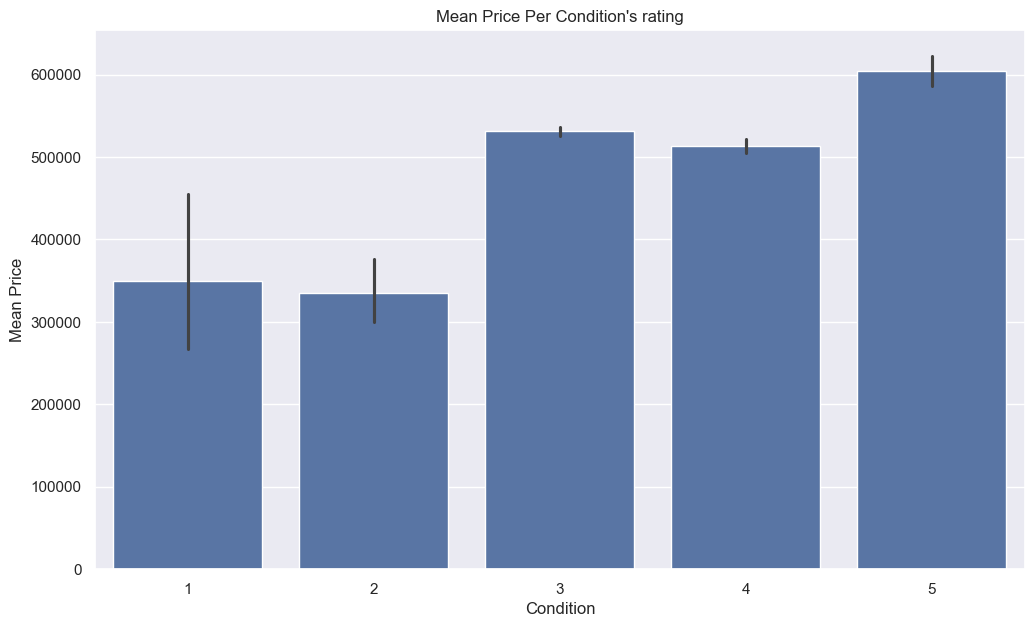

In [73]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='condition', y='price')
plt.title("Mean Price Per Condition's rating")
plt.xlabel('Condition')
plt.ylabel('Mean Price')
plt.show()

#### grade

In [74]:
df.grade.value_counts()

grade
7     8838
8     5999
9     2581
6     1987
10    1099
11     336
5      231
12      52
4       27
13       3
3        1
Name: count, dtype: int64

In [75]:
temp = df.groupby('grade')['price'].mean().values


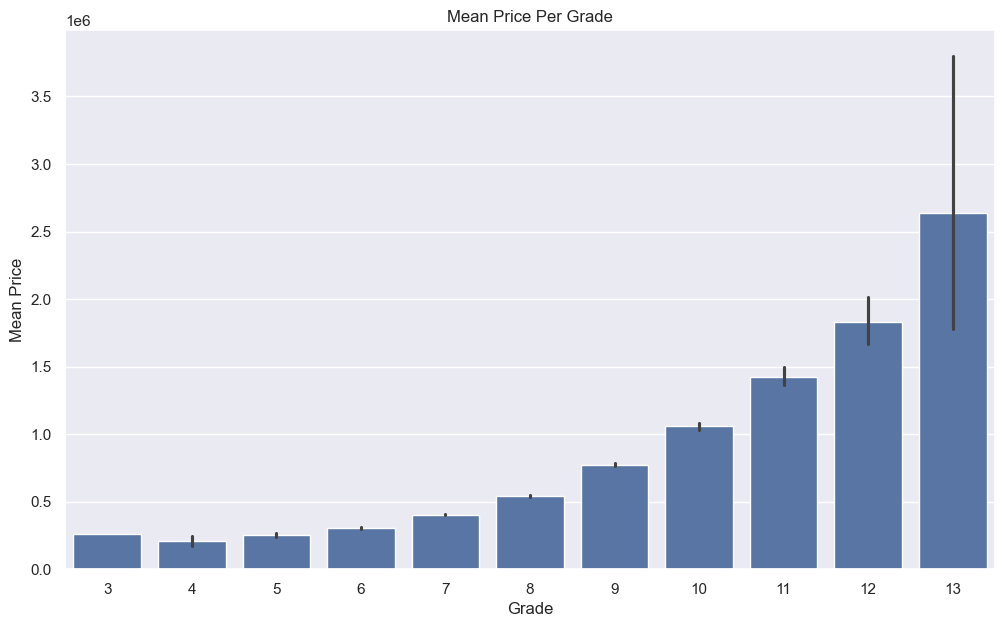

In [76]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='grade', y='price')
plt.title("Mean Price Per Grade")
plt.xlabel('Grade')
plt.ylabel('Mean Price')
plt.show()

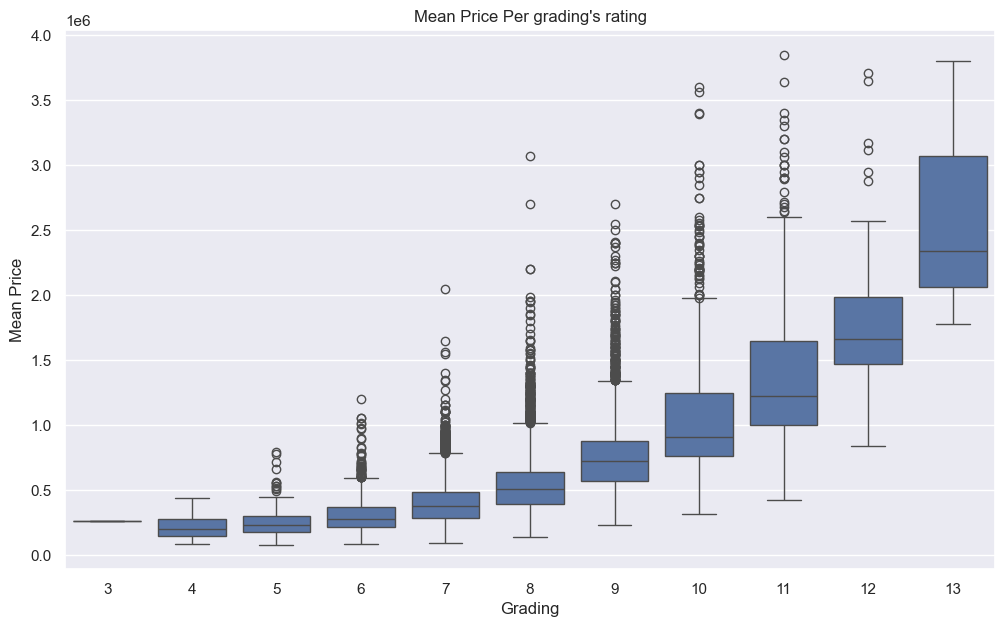

In [77]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='grade', y='price')
plt.title("Mean Price Per grading's rating")
plt.xlabel('Grading')
plt.ylabel('Mean Price')
plt.show()

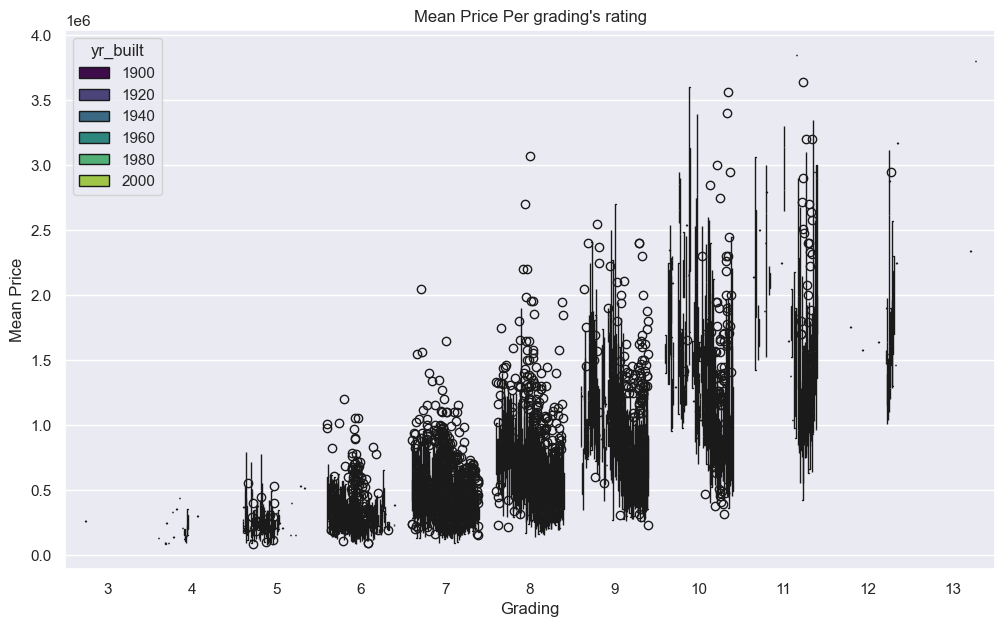

In [78]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='grade', y='price', hue='yr_built', palette='viridis')
plt.title("Mean Price Per grading's rating")
plt.xlabel('Grading')
plt.ylabel('Mean Price')
plt.show()

In [1]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='grade', y='price', hue='yr_built', palette='viridis')
plt.title("Mean Price Per grading's rating")
plt.xlabel('Grading')
plt.ylabel('Mean Price')
plt.show()

NameError: name 'plt' is not defined

In [80]:
df[df.grade <=4].shape[0]

28

Through exploring the dataset later on we eliminate more and more classes 12 and 13 so we determined it was worth dumping grades > to 11 since we are really dropping only 130s~ values by doing so.

In [81]:
df[df.grade >= 12].shape[0]

55

In [82]:
df = df[(df.grade >4) & (df.grade <12)]

The grade features appears to be relevant and we decide to unload entries with  grades inferior to 5 and superior to 11.

#### sqft_above

In [83]:
df.sqft_above.describe()

count    21071.000000
mean      1763.454986
std        773.758299
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2190.000000
max       5770.000000
Name: sqft_above, dtype: float64

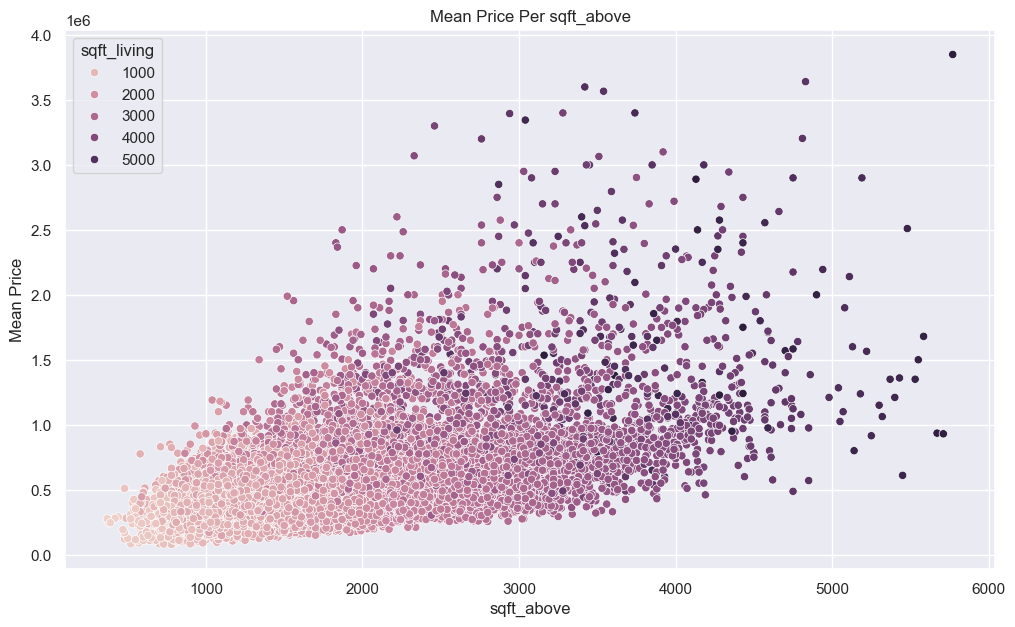

In [84]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='sqft_above', y='price', hue='sqft_living')
plt.title("Mean Price Per sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('Mean Price')
plt.show()

In [85]:
df[df.sqft_living > 4500].shape[0]

216

In [86]:
df = df[df.sqft_living <= 4500]

#### sqft_basement

In [87]:
df['sqft_basement'].value_counts(normalize=True)

sqft_basement
0       0.611796
600     0.010357
700     0.010165
500     0.010070
800     0.009782
          ...   
861     0.000048
792     0.000048
894     0.000048
1990    0.000048
248     0.000048
Name: proportion, Length: 263, dtype: float64

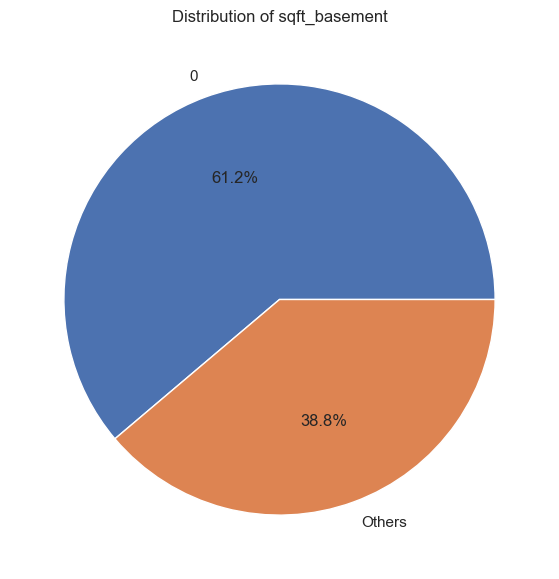

In [88]:
df.loc[:, 'sqft_basement_bin'] = pd.cut(df['sqft_basement'], bins=10, duplicates='drop')
value_counts = df['sqft_basement'].value_counts()

# Get the first bin and its count
main_bin = value_counts.index[0]
main_count = value_counts.iloc[0]
other_count = value_counts.iloc[1:].sum()
modified_value_counts = pd.Series([main_count, other_count], index=[main_bin, 'Others'])

modified_value_counts.plot.pie(autopct='%1.1f%%', figsize=(12, 7))
plt.title('Distribution of sqft_basement')
plt.ylabel('')  # Remove y-axis label
plt.show()


In [89]:
pd.Series([main_count, other_count], index=[main_bin, 'Others'])

0         12759
Others     8096
dtype: int64

This feature can be pretty misleading for a model since more than half of the feature's data is basically a class 0, we'll be making another visualisation before taking a decision.

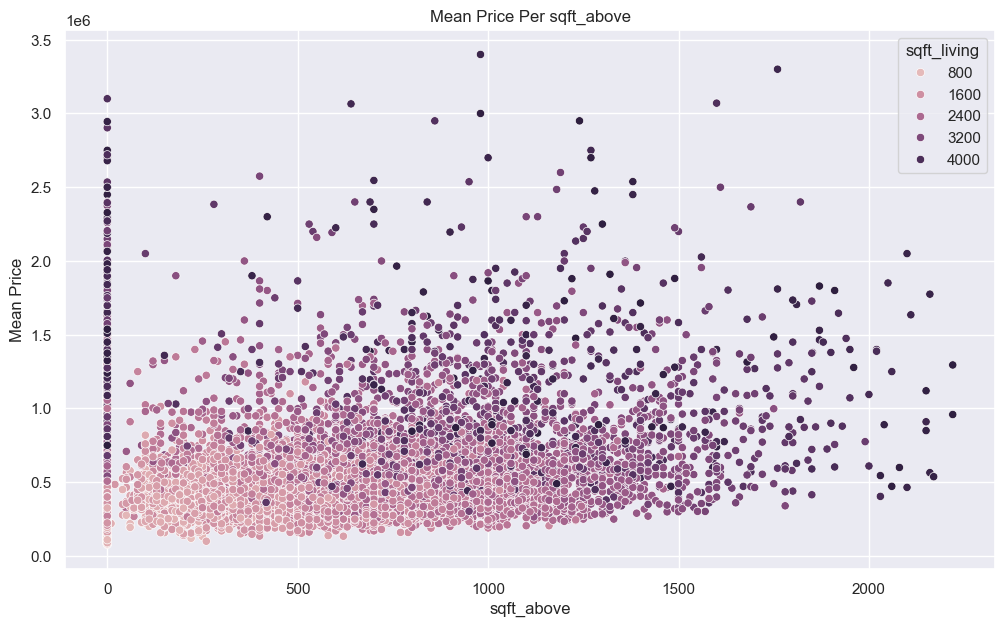

In [90]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='sqft_basement', y='price', hue='sqft_living')
plt.title("Mean Price Per sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('Mean Price')
plt.show()

The feature appears to be lightly significant but we'll try taking the next step.

Normally we would be cutting a small amount of extreme outliers that could prove to be hard to use but in this case it is worth attempting to classify those values into self made classes, we'll conclude on wether the feature should be used or not after doing so.

In [91]:
# df[df['sqft_basement'] > 1700].shape[0]
# df = df[df['sqft_basement'] <= 1700]

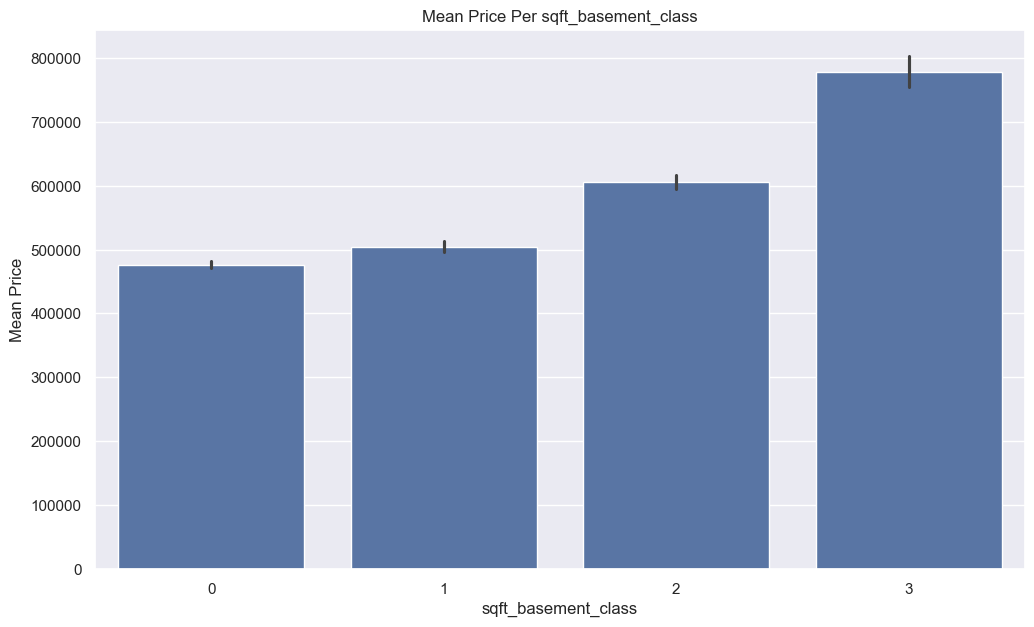

In [92]:
bins = [-1, 0.001, 700, 1100, float('inf')]
labels = [0, 1, 2, 3]

df['sqft_basement_class'] = pd.cut(df['sqft_basement'], bins=bins, labels=labels, right=False).astype(int)
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_basement_class', y='price')
plt.title("Mean Price Per sqft_basement_class")
plt.xlabel('sqft_basement_class')
plt.ylabel('Mean Price')
plt.show()

So the transformation appears to have been relevant, and the black lines also indicate a fairly low variability in price inside those classes.
We are looking forward to introducing this transformed feature to our model.

#### yr_built

In [93]:
print(f"range : {df.yr_built.min()} - {df.yr_built.max()}")

range : 1900 - 2015


No issue with this feature right here, we'll study it more in depth when doing the multivariate analysis with price in mind, making this into classes would be overdoing it we believe.

#### year_renovated

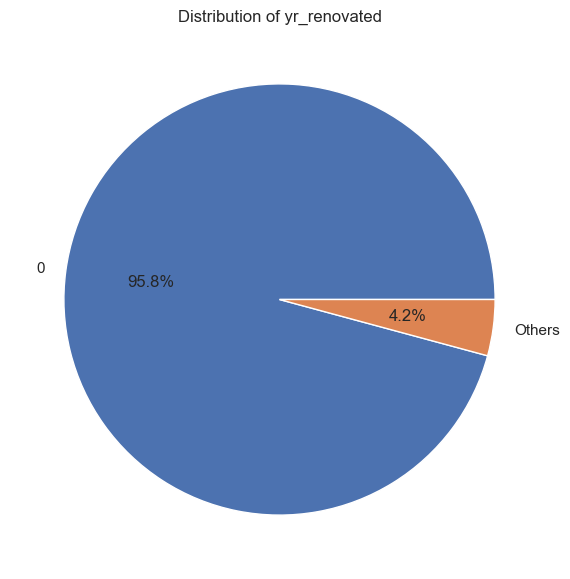

In [94]:
value_counts = df['yr_renovated'].value_counts()

# Get the first bin and its count
main_bin = value_counts.index[0]
main_count = value_counts.iloc[0]
other_count = value_counts.iloc[1:].sum()
modified_value_counts = pd.Series([main_count, other_count], index=[main_bin, 'Others'])

modified_value_counts.plot.pie(autopct='%1.1f%%', figsize=(12, 7))
plt.title('Distribution of yr_renovated')
plt.show()


In [95]:
pd.Series([main_count, other_count], index=[main_bin, 'Others'])

0         19978
Others      877
dtype: int64

In [96]:
df['bool_yr_renovated'] = df['yr_renovated'].apply(lambda x : 1 if x != 0 else 0)

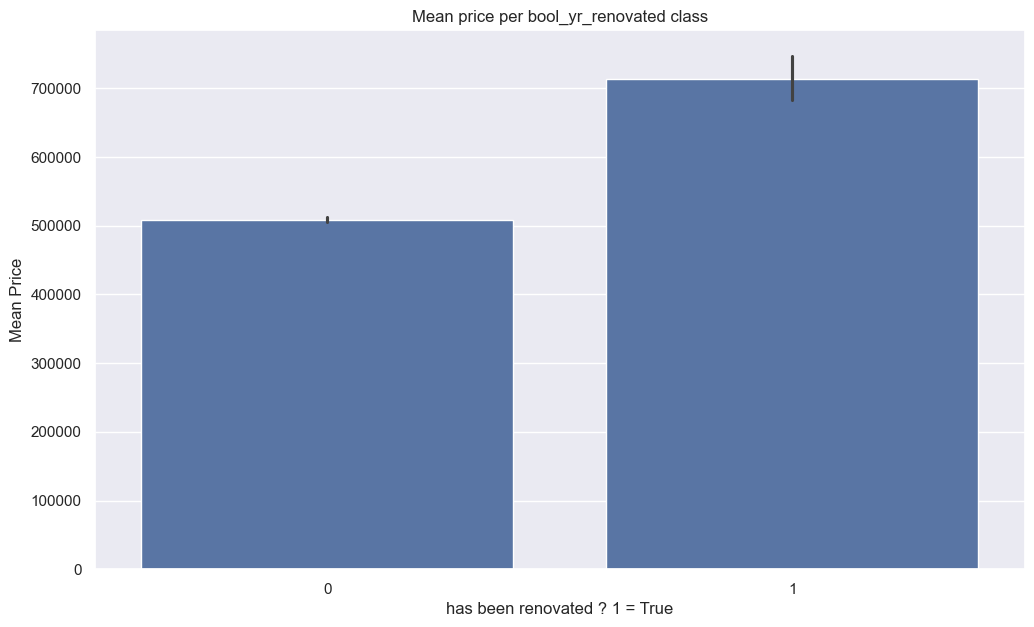

In [97]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='bool_yr_renovated', y='price', estimator=np.mean)
plt.title("Mean price per bool_yr_renovated class")
plt.xlabel('has been renovated ? 1 = True')
plt.ylabel('Mean Price')
plt.show()

So this is basically worth making it a binary class, but we'll still make an attempt at a better classification.

In [98]:
df.bool_yr_renovated.value_counts()

bool_yr_renovated
0    19978
1      877
Name: count, dtype: int64

After making some research we found out that houses really starts loosing values after not being renovated for the last 10-15 years so we'll be taking a wider margin of the last 20 years and only make 2 classes over those 771 values.

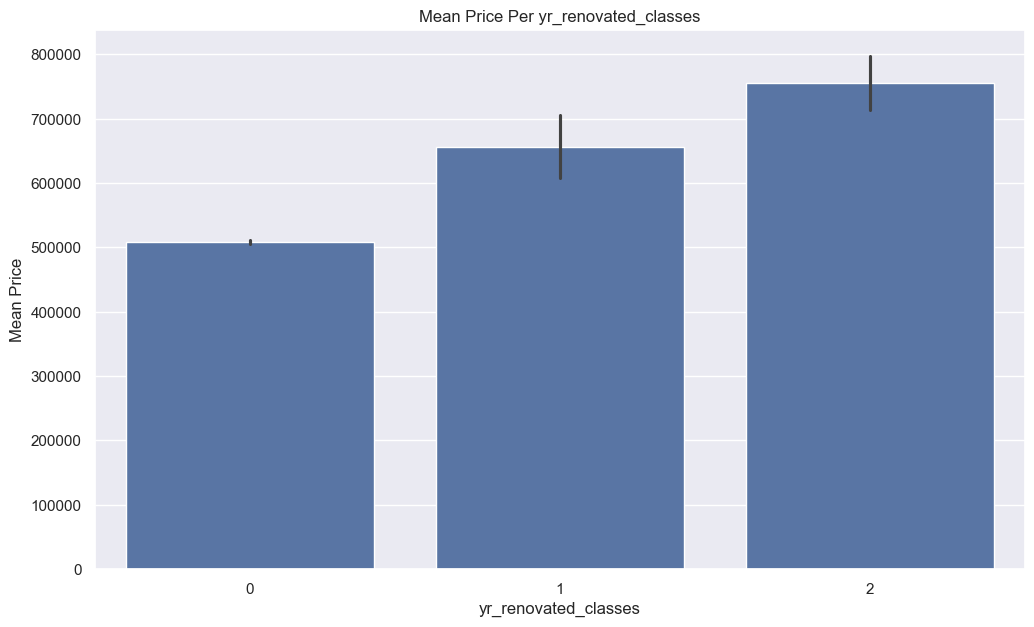

In [99]:
bins = [-1, 0.001, df['yr_renovated'].max()-20, float('inf')]
labels = [0, 1, 2]

df['yr_renovated_classes'] = pd.cut(df['yr_renovated'], bins=bins, labels=labels, right=False).astype(int)
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='yr_renovated_classes', y='price')
plt.title("Mean Price Per yr_renovated_classes")
plt.xlabel('yr_renovated_classes')
plt.ylabel('Mean Price')
plt.show()

So the transformation appears to have been successful like for sqft_basement but we do observe a higher variability of prices inside the different classes than for the other features.

Those results are still promising and we'll consider this transformed feature for what is next.

#### zipcode

In [100]:
df.zipcode.nunique()

70

In [101]:
df.zipcode[0:3]

0    98178
1    98125
2    98028
Name: zipcode, dtype: int64

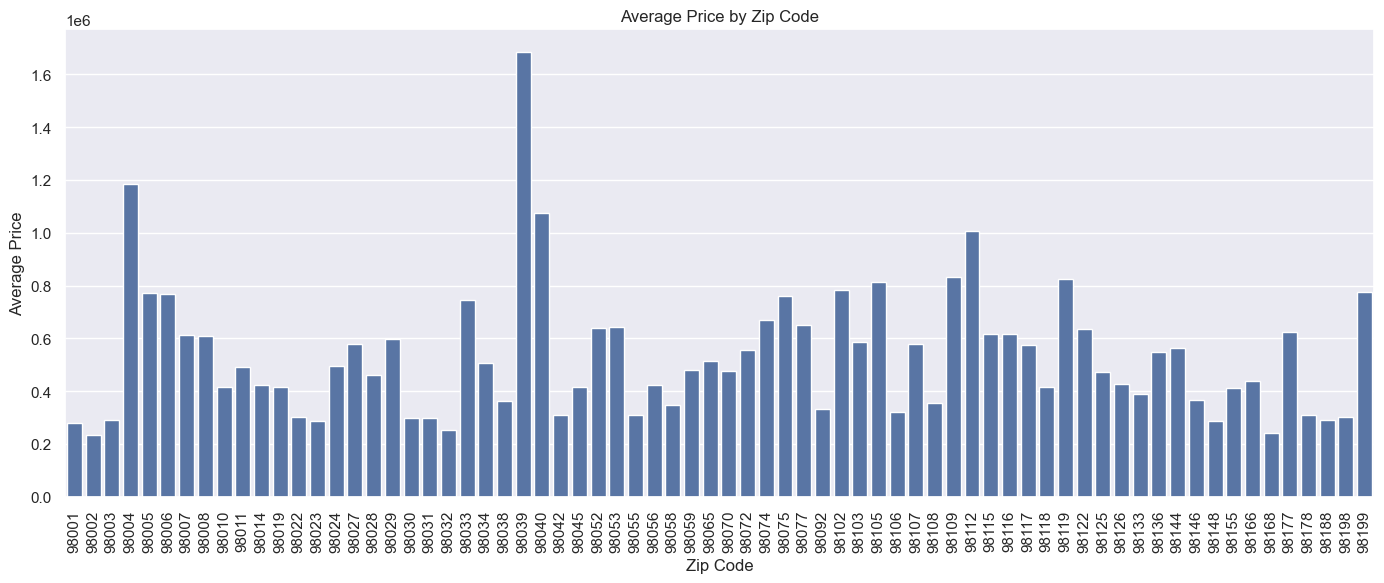

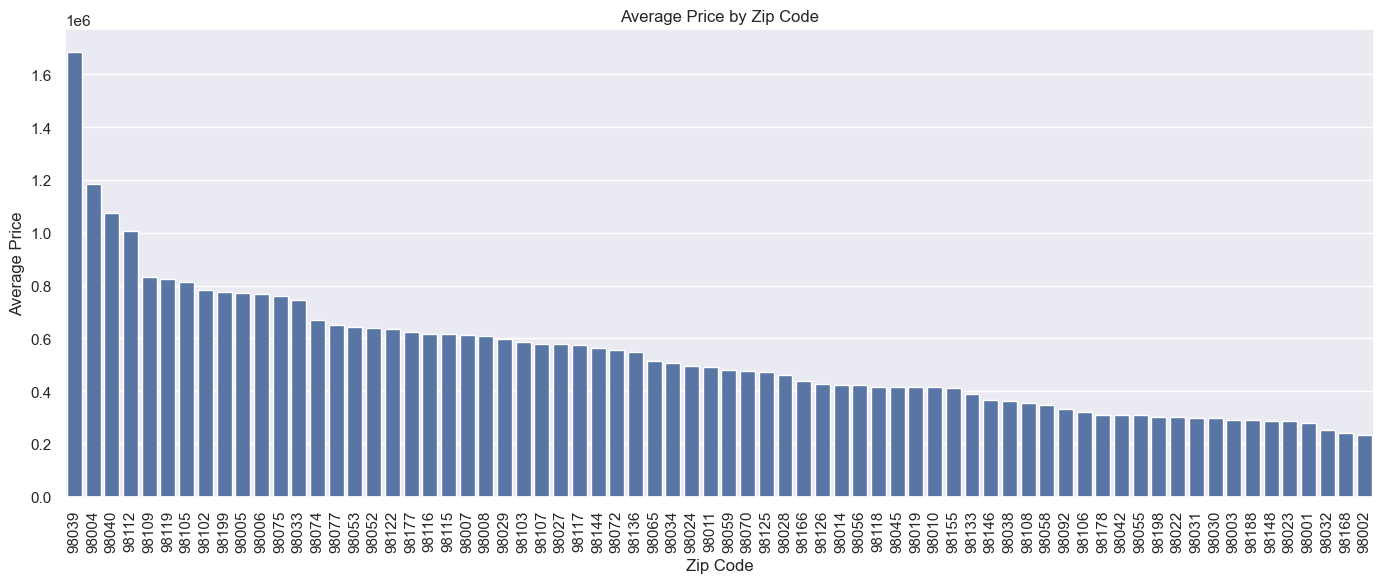

In [102]:
avg_price_by_zip = df.groupby('zipcode')['price'].mean().reset_index().sort_values(by='price', ascending=False).reset_index().drop(columns=['index'])

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_by_zip, x='zipcode', y='price')
plt.title('Average Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_by_zip, x='zipcode', y='price', order=avg_price_by_zip['zipcode'])
plt.title('Average Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


We can make it looks better than it really is by ordering it but there is no guarantee it holds real value. We'll be making an attempt at transforming it into 5 different classes to ordinal encode the same way in the pipeline.

In [103]:
# making a df that associate each zipcode with it's mean price
# reverting the order so class 4 is highest value instead of class 0
avg_price_by_zip = df.groupby('zipcode')['price'].mean().reset_index().sort_values(by='price', ascending=True)\
    .reset_index().drop(columns=['index'])

#making the 5 classes, 70/14 = 5 so class 4 will be last
avg_price_by_zip.price = avg_price_by_zip.apply(lambda x : x.index//14)["price"]

# converting to a dict to fuse with main df
zip_dict = dict(zip(avg_price_by_zip['zipcode'], avg_price_by_zip['price']))

# making a security for unknown zipcodes that it would be classified as class 1 (second lowest was a safe bet, highly populated too 23%)
df['zipcode_class'] = df.zipcode.apply(lambda x :zip_dict[x] if x in zip_dict.keys() else 1)


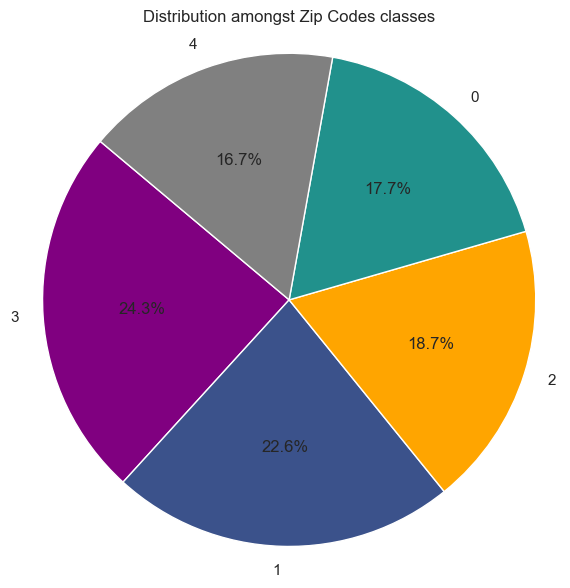

In [104]:
plt.figure(figsize=(7, 7))
plt.pie(df['zipcode_class'].value_counts(), labels=df['zipcode_class'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=custom_palette_f5)
plt.title('Distribution amongst Zip Codes classes')
plt.axis('equal')
plt.show()


We didn't aim for the distribution to be balanced at all with this method so the fairly close distribution is pretty satisfying.

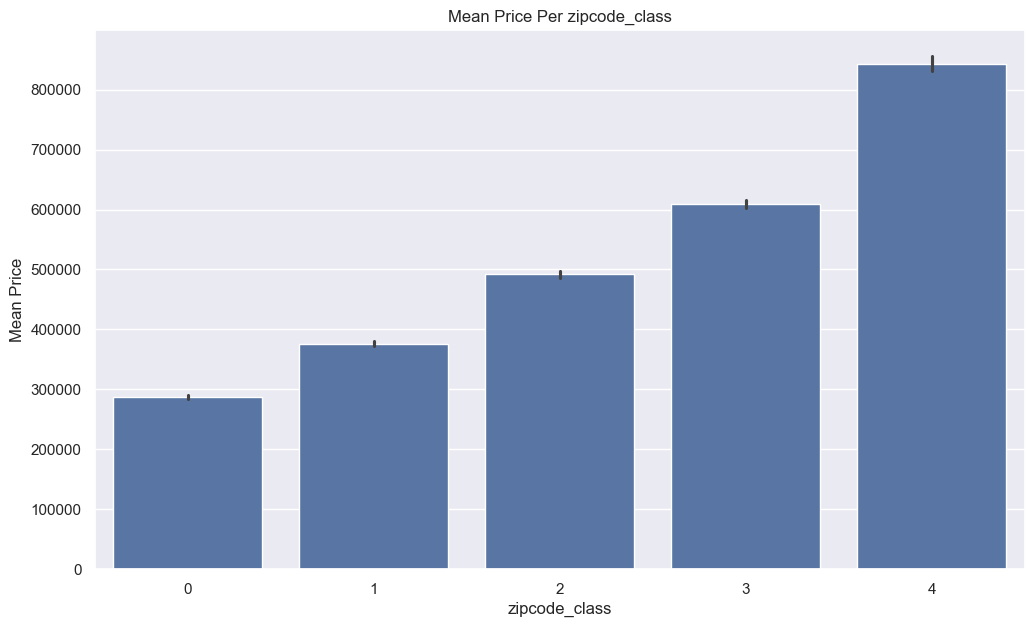

In [105]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='zipcode_class', y='price')
plt.title("Mean Price Per zipcode_class")
plt.xlabel('zipcode_class')
plt.ylabel('Mean Price')
plt.show()

Clearly seems to have had a positive effect on the potential usefulness of zipcode, we'll be using this feature if it goes throught multicolinearity tests.

#### lat

In [106]:
df.lat.min()

47.1559

In [107]:
df.lat.max()

47.7776

No obvious position issue here, we'll visualize it later with a map if the feature is statistically relevant, this is also true for the longitude.


#### long

In [108]:
df.long.min()

-122.515

In [109]:
df.long.max()

-121.315

#### sqft_living15

In [110]:
df.sqft_living15

0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21608    1530
21609    1830
21610    1020
21611    1410
21612    1020
Name: sqft_living15, Length: 20855, dtype: int64

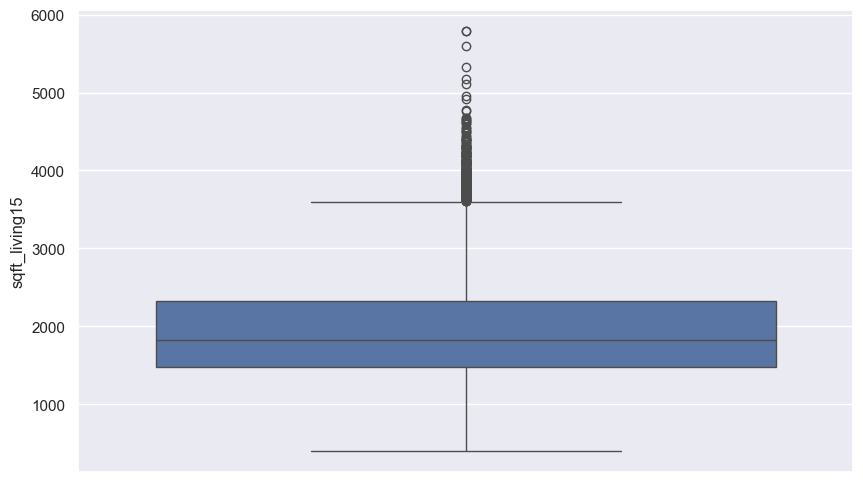

In [111]:
df.floors.value_counts()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='sqft_living15')
plt.show()

In [112]:
df[df.sqft_living15 > 4800].shape[0]

8

In [113]:
df = df[df.sqft_living15 <= 4800]

We decide to simply drop rows with extreme outliers to avoid losing to much data, atleast for now.

#### sqft_lot15

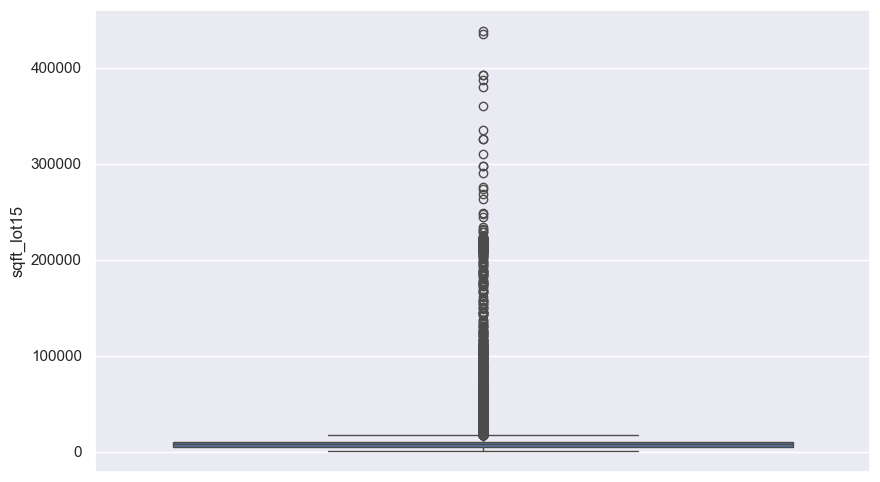

In [114]:
df.floors.value_counts()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='sqft_lot15')
plt.show()

A number of outliers make it hard to visualize this feature, we'll be making a different graphic.

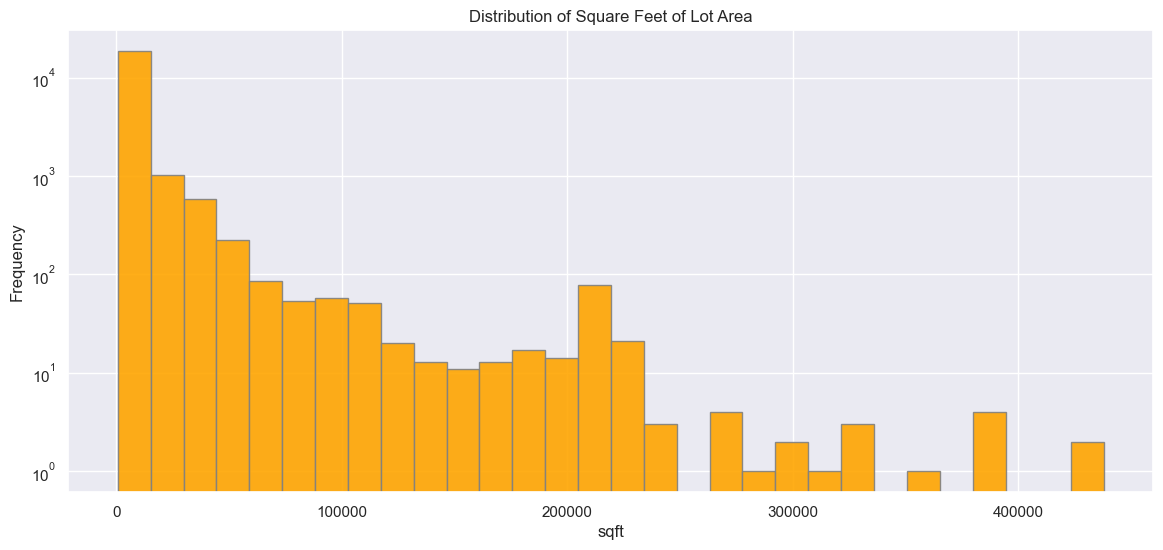

In [115]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot15'], bins=30, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('sqft')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Square Feet of Lot Area')

plt.show()

In [116]:
df[df.sqft_lot15 > 220000].shape[0]

39

In [117]:
df = df[df.sqft_lot15 <= 220000]

Again, we decide to drop rows with extreme outliers.

#### price

In [118]:
df.price.describe()

count    2.080800e+04
mean     5.166911e+05
std      2.942578e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.483375e+05
75%      6.299500e+05
max      3.400000e+06
Name: price, dtype: float64

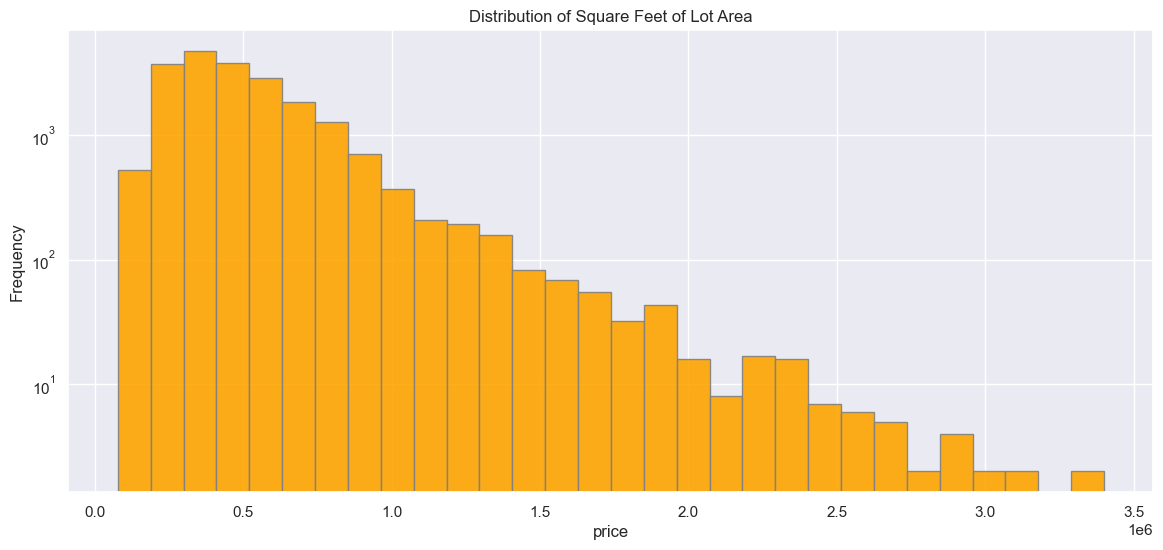

In [119]:
plt.figure(figsize=(14, 6))
plt.hist(df['price'], bins=30, color='orange', alpha=0.9, edgecolor='grey')

plt.xlabel('price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Square Feet of Lot Area')

plt.show()

<Axes: xlabel='price', ylabel='Count'>

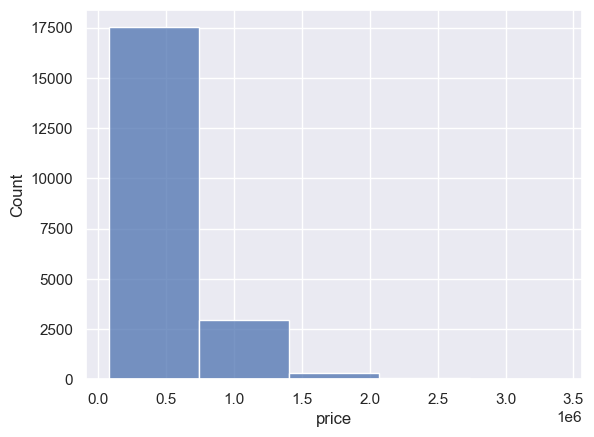

In [120]:
sns.histplot(df.price, bins=5)

In [121]:
df.price.describe()

count    2.080800e+04
mean     5.166911e+05
std      2.942578e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.483375e+05
75%      6.299500e+05
max      3.400000e+06
Name: price, dtype: float64

In [122]:
df.price.sort_values(ascending = False)

10446    3400000.0
18199    3300000.0
7313     3100000.0
656      3070000.0
15258    3065000.0
           ...    
3767       84000.0
18468      83000.0
2141       82500.0
16198      81000.0
15293      78000.0
Name: price, Length: 20808, dtype: float64

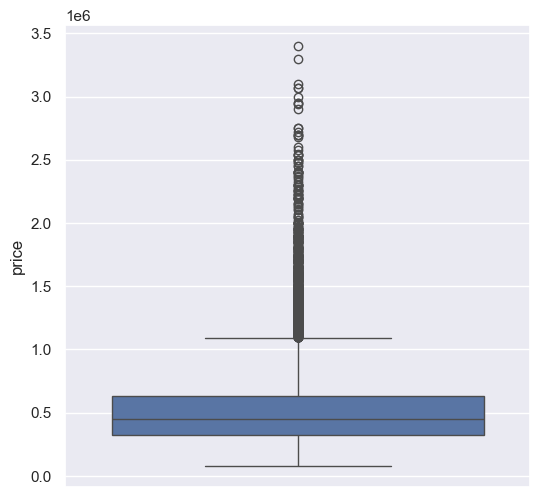

In [123]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='price', data=df)
plt.show()

For the sake of regression modelling we only keep price value according to the interquartile range to determine outliers values.

$(IQR = Q1 - Q2)$

$(Q1-1.5*IQR - Q3+1.5*IQR)$

In [124]:
df = iqr_range_price_filter(df, 'price')

old number of rows 20808
new number of rows 19919


Since we are aiming to solve our use case by a regression model, at least one of them being a linear regression, is it important to apply a strict elimination of outliers. Despite them having meaning, we accept the risk of reducing the quality of our model's prediction on expensive lots to better our performance on the bulk of the properties.

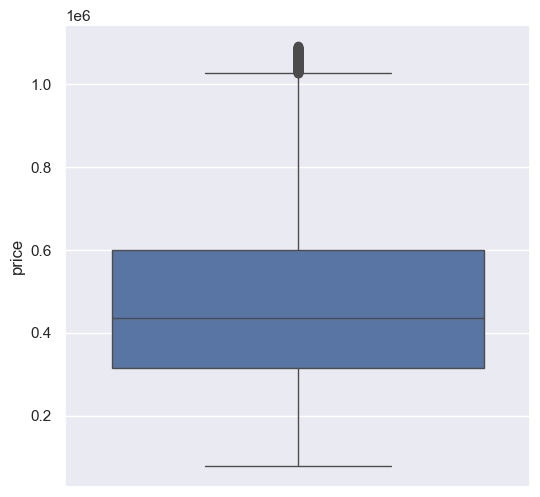

In [125]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='price', data=df)
plt.show()

### Multi feature analysis

####  Date

In [126]:

df['date'] = pd.to_datetime(df['date'])

# Extract relevant features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = pd.get_dummies(df, columns=['month'])  # Example for month, do similarly for other categorical features

df.columns[-15:]


Index(['zipcode_class', 'year', 'day', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

#####  Encoded Month study

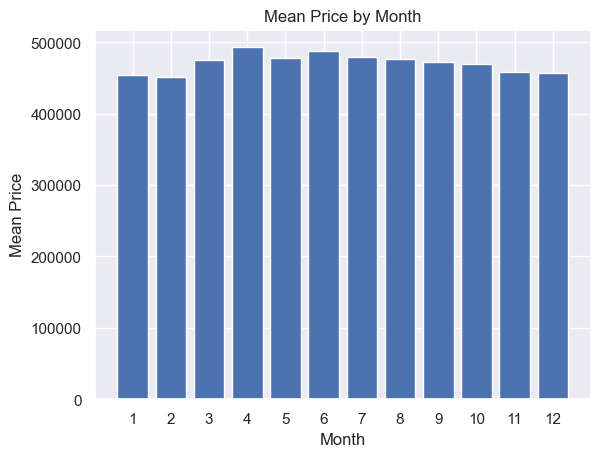

In [127]:
mean_prices = []
for month in range(1, 13):
    month_col = f'month_{month}'
    filtered_df = df[df[month_col] == 1]
    mean_prices.append(filtered_df['price'].mean())


plt.bar(range(1, 13), mean_prices)
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.title('Mean Price by Month')
plt.xticks(range(1, 13))
plt.show()


It is hard to tell how relevant this feature would end up but the graph confirms the expectation we have entering in that people don't move in the winter so it must be harder to sell during that season. This could also be related to yearly taxes or others obligations.

#####  Day

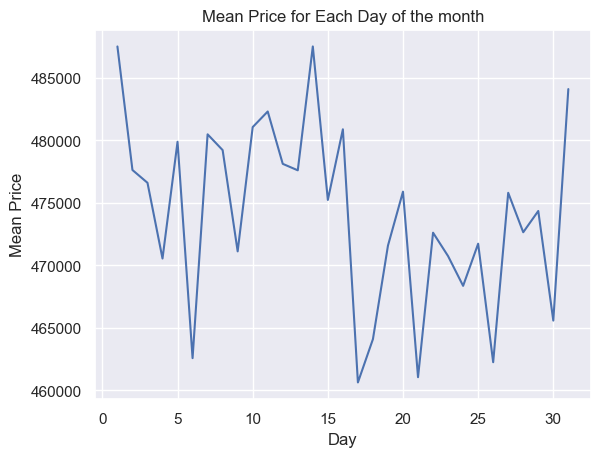

In [128]:
# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Calculate the mean price for each day
mean_prices_per_day = df.groupby(df['date'].dt.day)['price'].mean()

# Plot the mean prices for each day
plt.plot(mean_prices_per_day.index, mean_prices_per_day.values)
plt.xlabel('Day')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Day of the month')
plt.show()


The gap between the day of the months for a sell doesn't appears to be that wide, we doubt this feature will end up being relevant, despite the line appearing to tank a bit around the 18-26 of each months. 

##### year

In [129]:
temp = df.groupby('year')['price'].mean().reset_index()
temp

,year,price
0,2014,473968.128005
1,2015,473663.144246


In [130]:
temp['price'][1] - temp['price'][0]

-304.9837591598043

The difference in mean price for houses solds in 2015 and 2014 is insignificant, we probably won't be using this feature. This probably would have been more relevant if we had more years of inputs.

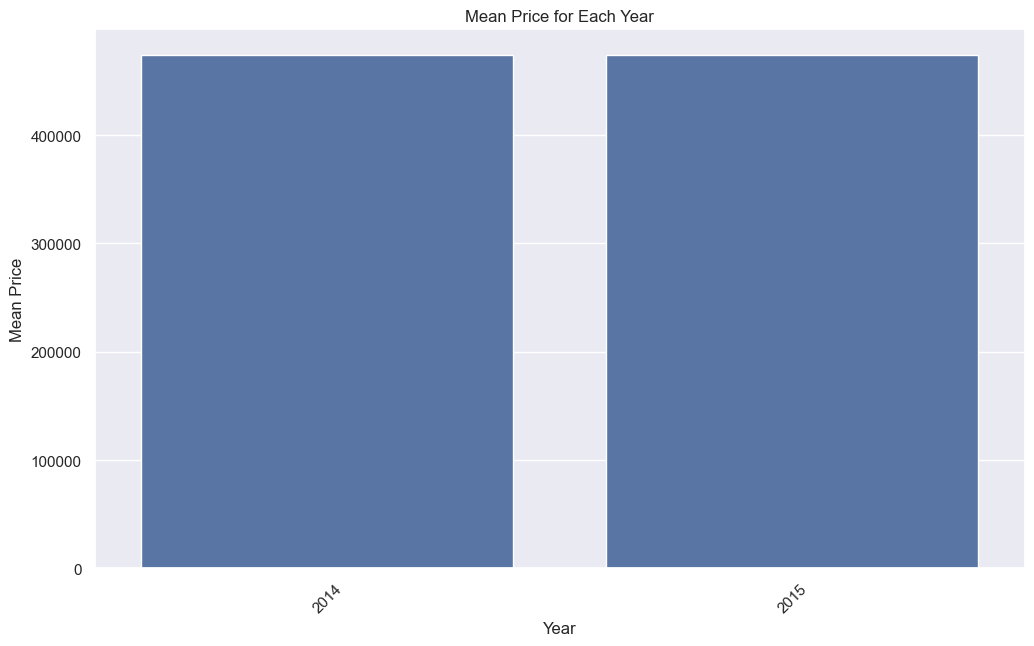

In [131]:
plt.figure(figsize=(12, 7))
sns.barplot(x='year', y='price', data=temp)

plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Year')
plt.xticks(rotation=45)
plt.show()


#### bathrooms

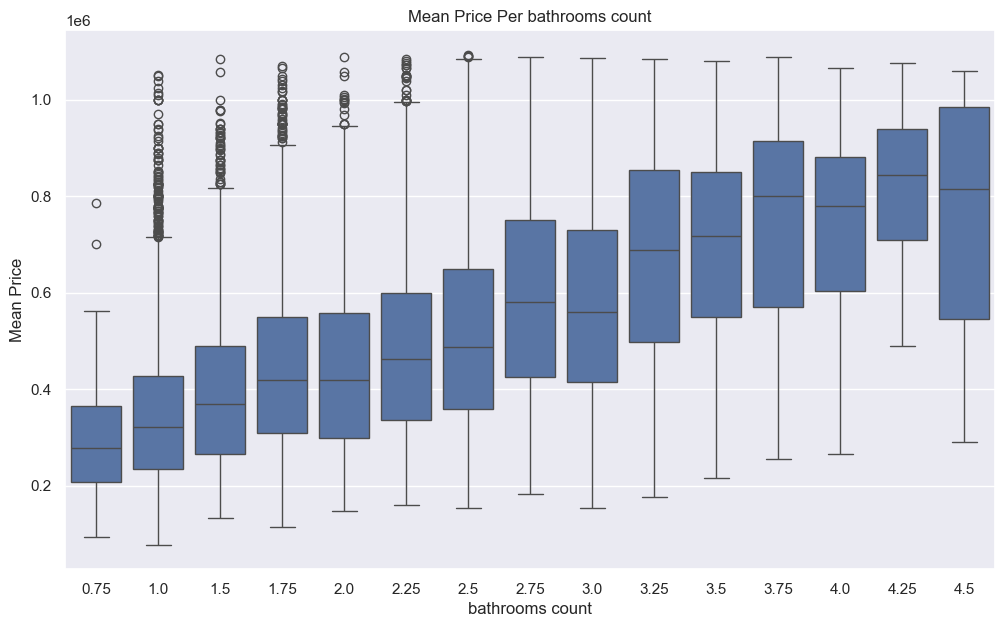

In [132]:

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title("Mean Price Per bathrooms count")
plt.xlabel('bathrooms count')
plt.ylabel('Mean Price')
plt.show()

It follow common sense that having more bathroom is a luxe, so this isn't surpising but there is a clear correlation betwen price and bathrooms.


#### floors

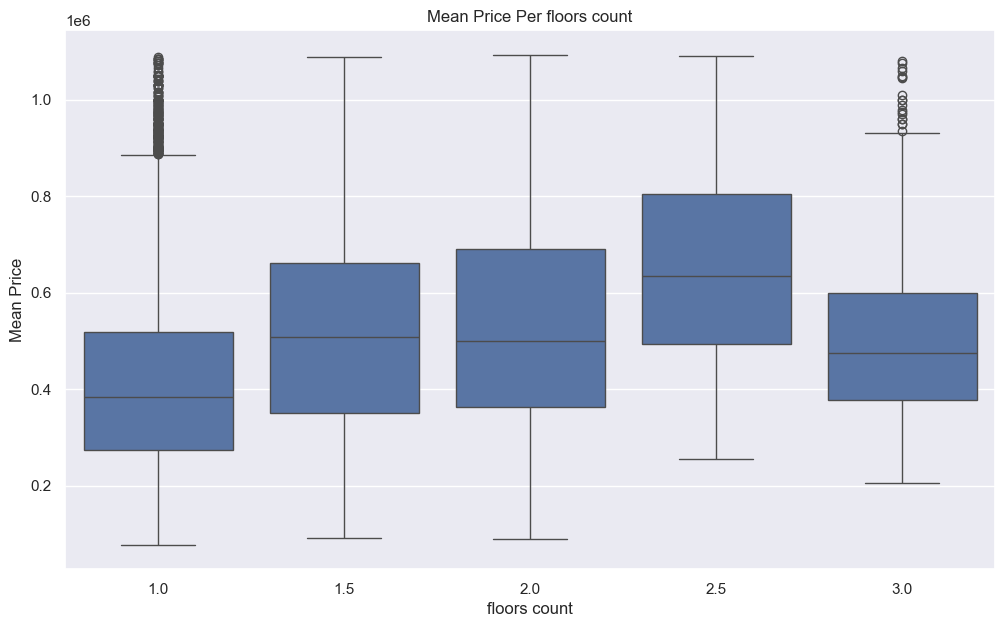

In [133]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='floors', y='price')
plt.title("Mean Price Per floors count")
plt.xlabel('floors count')
plt.ylabel('Mean Price')
plt.show()

In [134]:
df[df['floors'] == 3].shape[0]

565

Hard to tell if this is usable if we don't drop the floors = 3 but we won't drop them as there are too many.

#### sqft_living

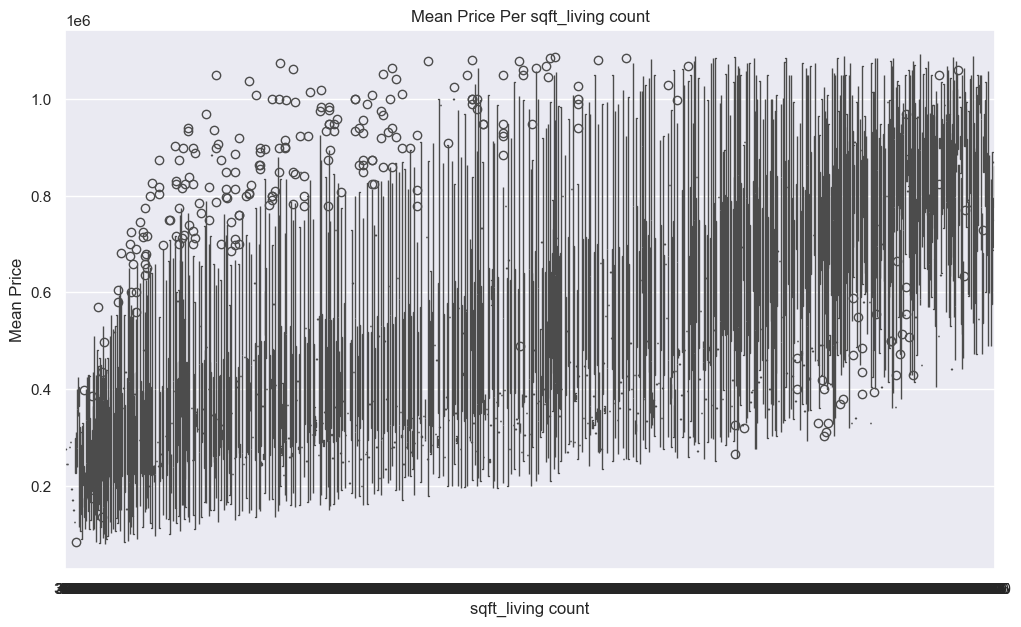

In [135]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='sqft_living', y='price')
plt.title("Mean Price Per sqft_living count")
plt.xlabel('sqft_living count')
plt.ylabel('Mean Price')
plt.show()

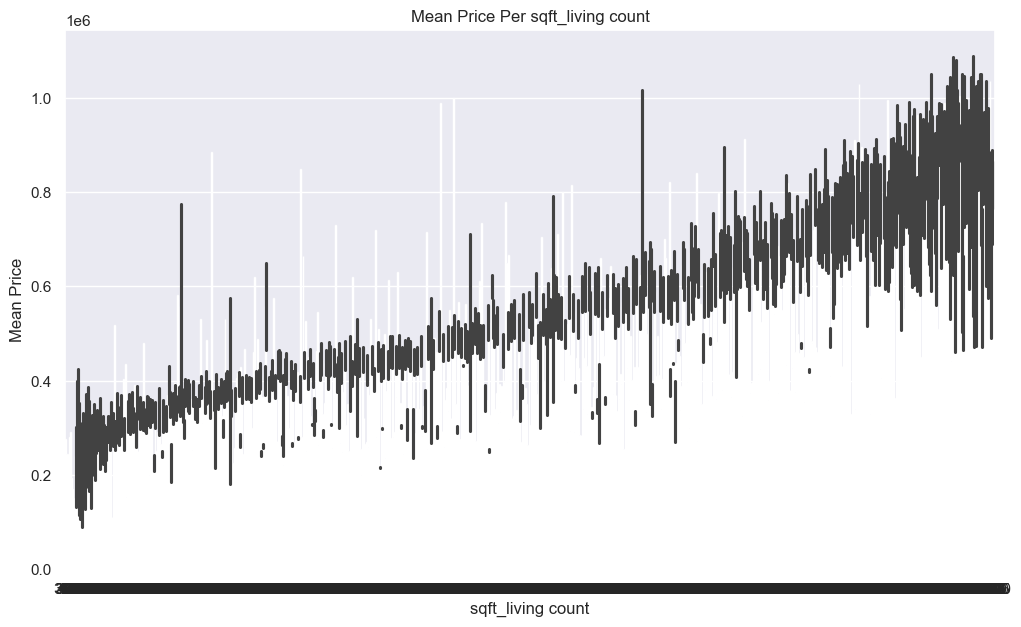

In [136]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_living', y='price')
plt.title("Mean Price Per sqft_living count")
plt.xlabel('sqft_living count')
plt.ylabel('Mean Price')
plt.show()

In [137]:
pd.cut(df['sqft_living'], bins=10)

0         (783.0, 1196.0]
1        (2435.0, 2848.0]
2         (365.87, 783.0]
3        (1609.0, 2022.0]
4        (1609.0, 2022.0]
               ...       
21608    (1196.0, 1609.0]
21609    (2022.0, 2435.0]
21610     (783.0, 1196.0]
21611    (1196.0, 1609.0]
21612     (783.0, 1196.0]
Name: sqft_living, Length: 19919, dtype: category
Categories (10, interval[float64, right]): [(365.87, 783.0] < (783.0, 1196.0] < (1196.0, 1609.0] < (1609.0, 2022.0] ... (2848.0, 3261.0] < (3261.0, 3674.0] < (3674.0, 4087.0] < (4087.0, 4500.0]]

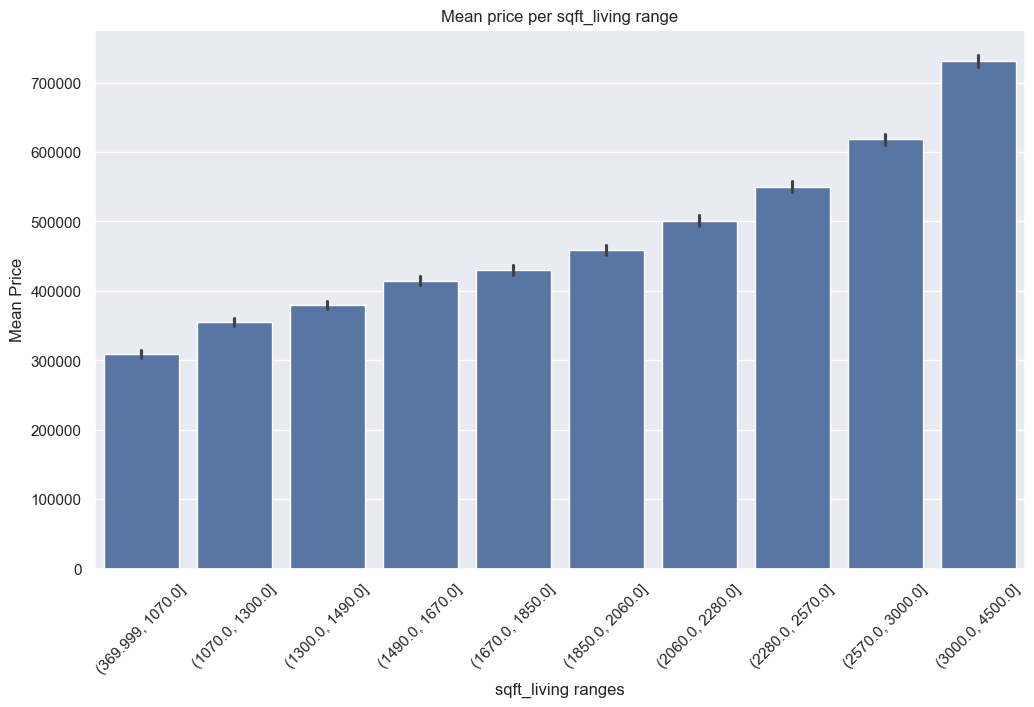

In [138]:
df['sqft_living_bin'] = pd.qcut(df['sqft_living'], q=10)

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_living_bin', y='price', estimator=np.mean)
plt.title("Mean price per sqft_living range")
plt.xlabel('sqft_living ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()


This is a very interesting feature, we'll be keeping it in it's original numerical form.

#### sqft_lot

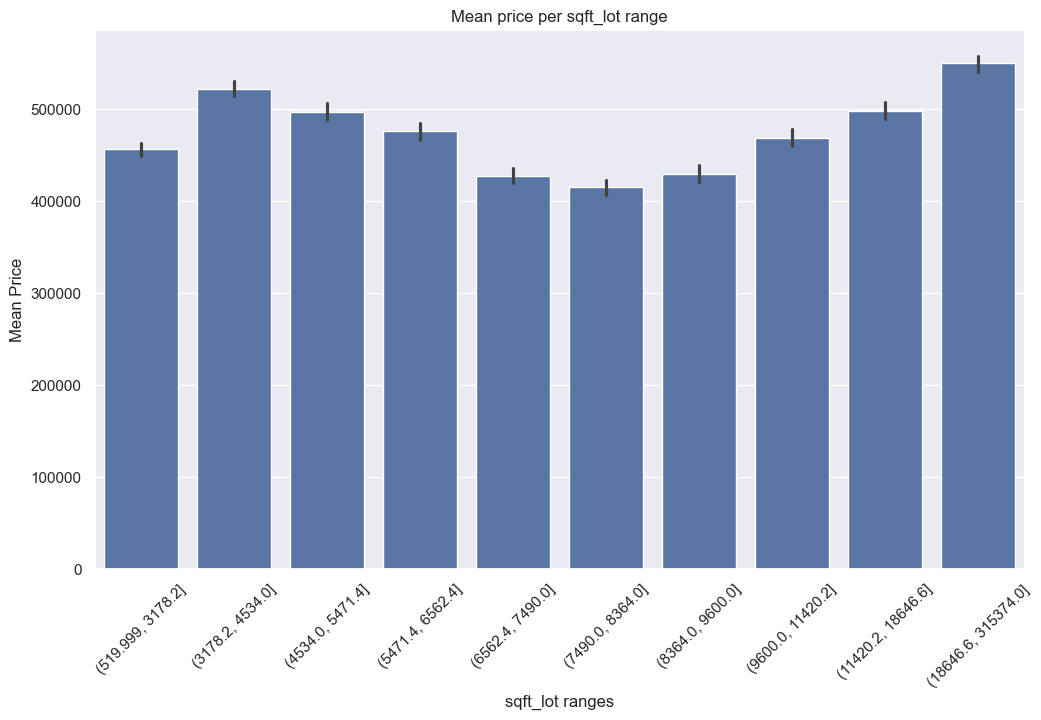

In [139]:
df.sqft_lot

# df['sqft_lot_bin'] = pd.cut(df['sqft_lot'], bins=10)
df['sqft_lot_bin'] = pd.qcut(df['sqft_lot'], q=10, duplicates='drop')

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_lot_bin', y='price', estimator=np.mean)
plt.title("Mean price per sqft_lot range")
plt.xlabel('sqft_lot ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()






It's not clear that this property will be of any use for the model, the distribution for each range appears to be pretty random with only one low at the start and one single high this isn't inspiring.

#### sqft_above

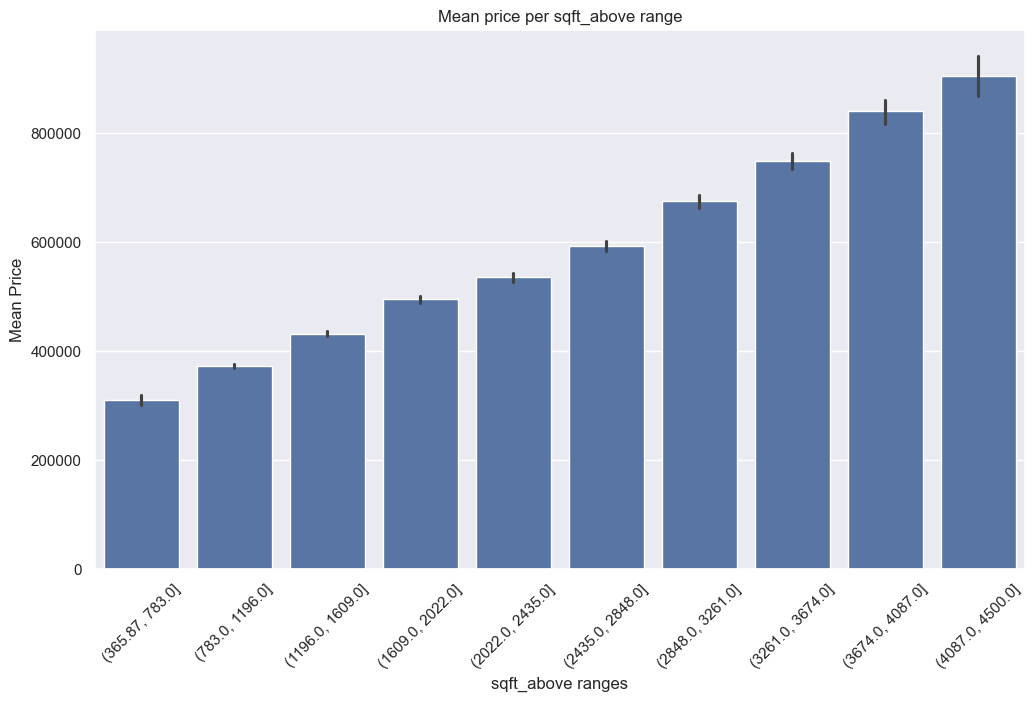

In [140]:
df.sqft_lot

df['sqft_above_bin'] = pd.cut(df['sqft_above'], bins=10)

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_above_bin', y='price', estimator=np.mean)
plt.title("Mean price per sqft_above range")
plt.xlabel('sqft_above ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()


As expected, most characteristics related to square footage are very impactful, this one included.
We tested both cut and qcut.

#### sqft_basement_class

**This feature has already been engineered with price in mind in the single feature analysis, from sqft_basement_class**

#### sqft_living15

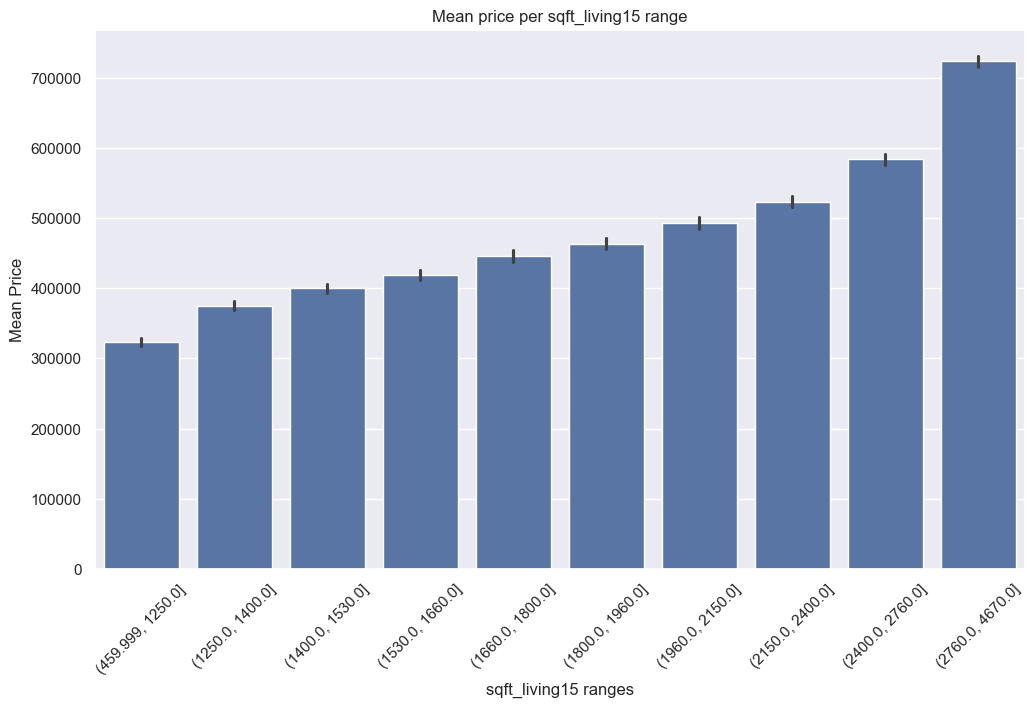

In [141]:
df.sqft_lot

df['sqft_living15_bin'] = pd.qcut(df['sqft_living15'], q=10)

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_living15_bin', y='price', estimator=np.mean)
plt.title("Mean price per sqft_living15 range")
plt.xlabel('sqft_living15 ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()


Seeing how consistent the steep rise of the average price for the different ranges of the neighborhood square footage is highly encouraging for our machine learning use case. We're using the original feature

#### sqft_lot15

Even thought sqft_lot was lackluster, we hope this one will be more relevant with an average value for the whole neighboorhood of the house. 

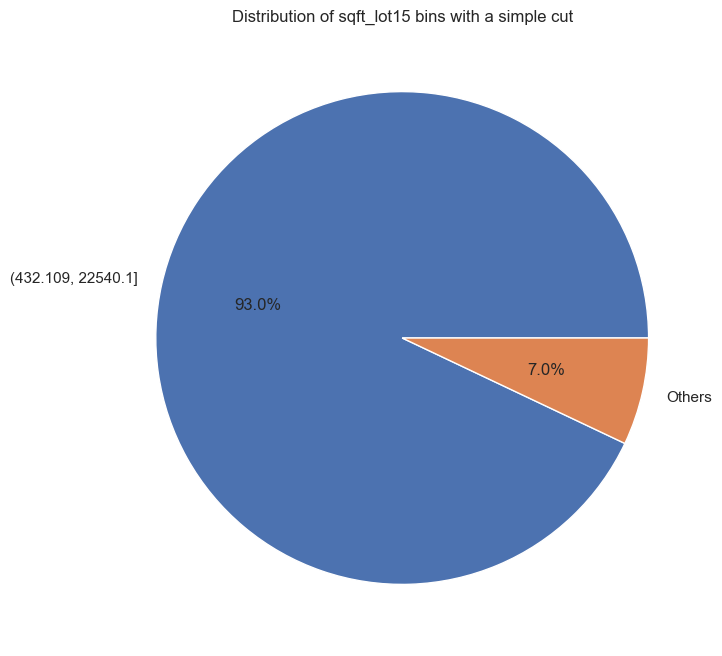

In [142]:
df['sqft_lot15_bin'] = pd.cut(df['sqft_lot15'], bins=10, duplicates='drop')
value_counts = df['sqft_lot15_bin'].value_counts()

# Get the first bin and its count
main_bin = value_counts.index[0]
main_count = value_counts.iloc[0]
other_count = value_counts.iloc[1:].sum()
modified_value_counts = pd.Series([main_count, other_count], index=[main_bin, 'Others'])

modified_value_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of sqft_lot15 bins with a simple cut')
plt.ylabel('')  # Remove y-axis label
plt.show()

df['sqft_lot15_bin'] = pd.qcut(df['sqft_lot15'], q=10, duplicates='drop')


This one should definitely be displayed throught a qcut.

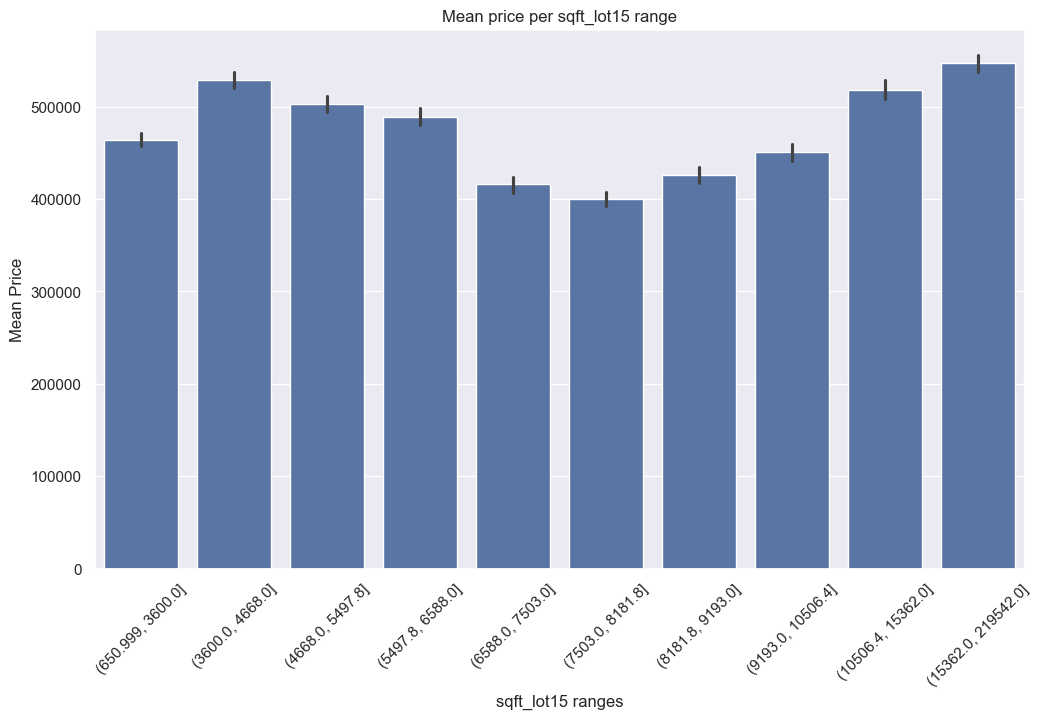

In [143]:
df['sqft_lot15_bin'] = pd.qcut(df['sqft_lot15'], q=10, duplicates='drop')

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='sqft_lot15_bin', y='price', estimator=np.mean)
plt.title("Mean price per sqft_lot15 range")
plt.xlabel('sqft_lot15 ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

This feature is either pretty unrelated to price or it could also make sense that slightly above 10th percentile neighboorhood square footage mean price are pumped up by luxe appartments often being in those ranges which would explain the later decrease on the middle part of the graph, but it is pretty unlikely so we will further test this one when taking decisions for the feature selection.

#### bedrooms

In [144]:
df.bedrooms.value_counts()

bedrooms
3    9430
4    6174
2    2674
5    1265
6     203
1     173
Name: count, dtype: int64

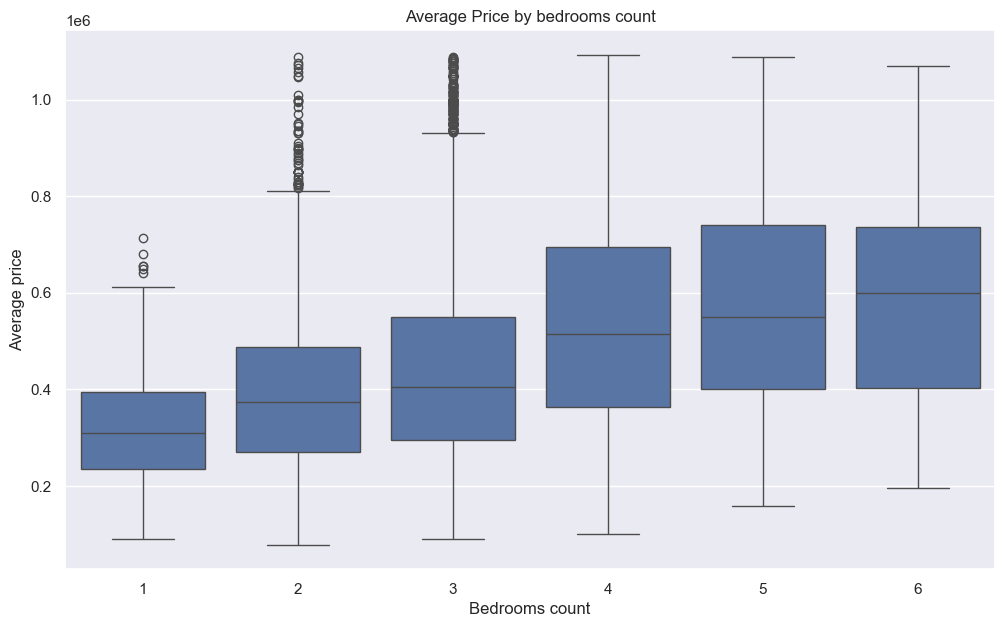

In [145]:
import seaborn as sns


plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Average Price by bedrooms count')
plt.xlabel('Bedrooms count')
plt.ylabel('Average price')
plt.show()


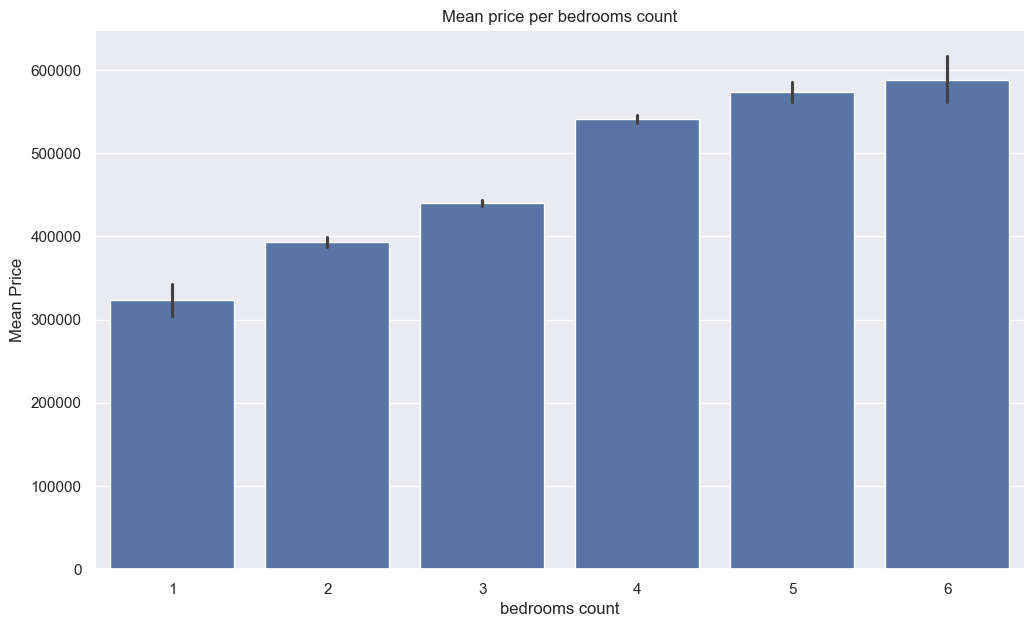

In [146]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='bedrooms', y='price', estimator=np.mean)
plt.title("Mean price per bedrooms count")
plt.xlabel('bedrooms count')
plt.ylabel('Mean Price')
plt.show()


While this isn't perfect and has varying distribution for number of bedrooms at 0 and above 6, this feature could still be encouraging.

#### waterfront

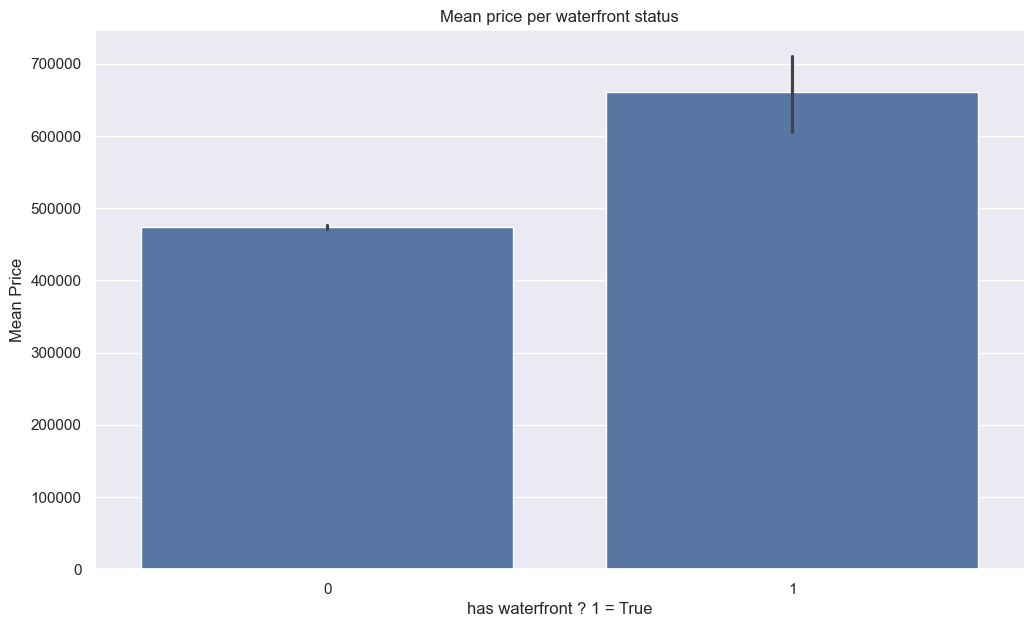

In [147]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='waterfront', y='price', estimator=np.mean)
plt.title("Mean price per waterfront status")
plt.xlabel('has waterfront ? 1 = True')
plt.ylabel('Mean Price')
plt.show()

In [148]:
df.waterfront.value_counts(normalize=True)

waterfront
0    0.997038
1    0.002962
Name: proportion, dtype: float64

This feature definitely could be helpful but we remember it got a very low count of houses with waterfront.

#### view

In [149]:
df.view
df.view.value_counts(normalize=True)


view
0    0.925348
2    0.038456
3    0.016115
1    0.013304
4    0.006777
Name: proportion, dtype: float64

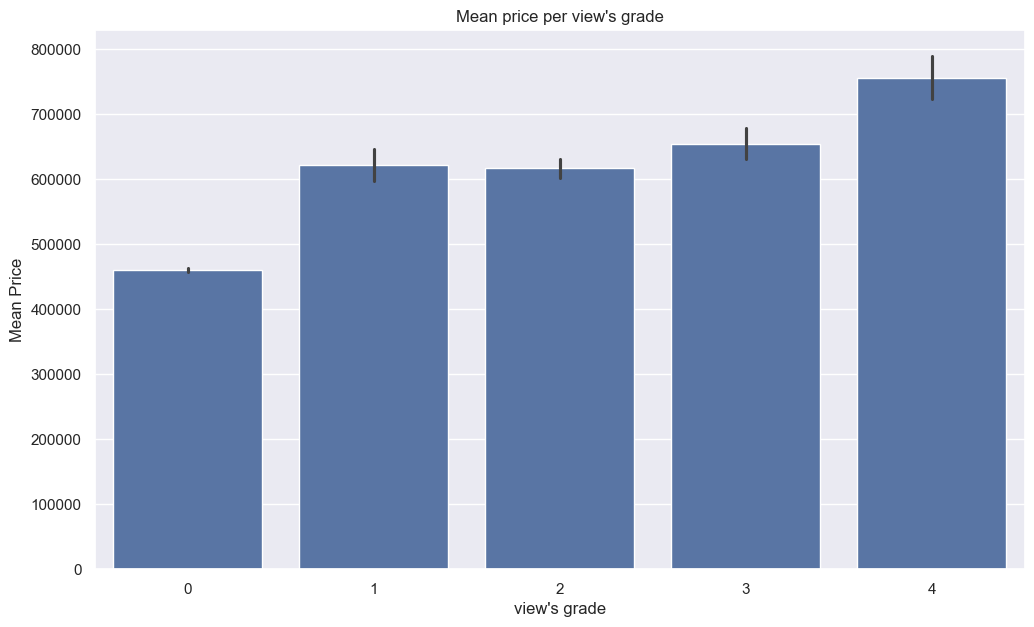

In [150]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='view', y='price', estimator=np.mean)
plt.title("Mean price per view's grade")
plt.xlabel("view's grade")
plt.ylabel('Mean Price')
plt.show()

Nothing clear here but we may give it a try.

#### condition

In [151]:
df.condition.value_counts(normalize=True)


condition
3    0.649079
4    0.265726
5    0.076259
2    0.007631
1    0.001305
Name: proportion, dtype: float64

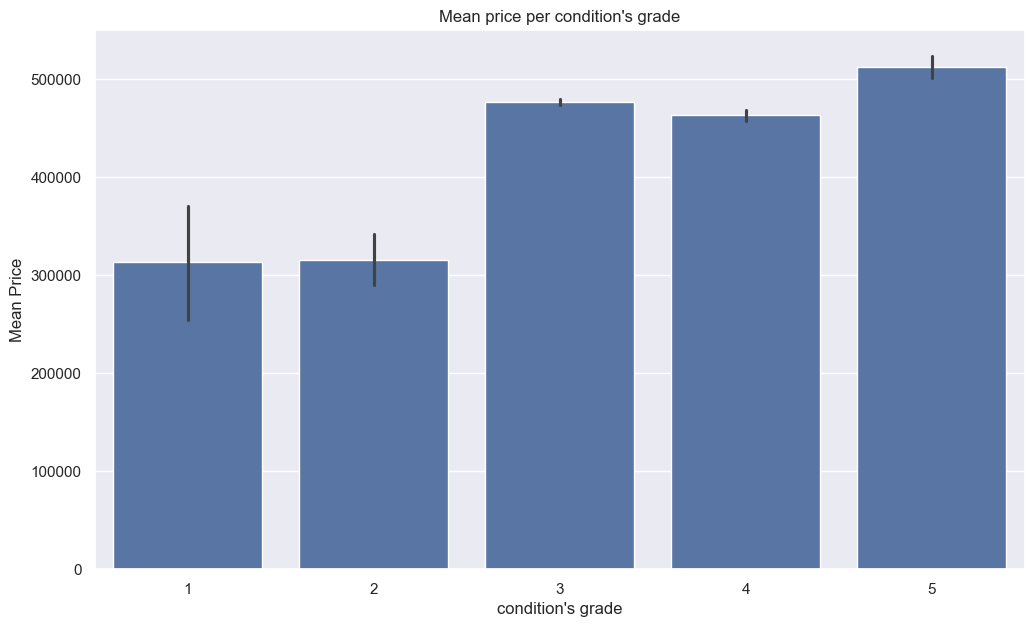

In [152]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='condition', y='price', estimator=np.mean)
plt.title("Mean price per condition's grade")
plt.xlabel("condition's grade")
plt.ylabel('Mean Price')
plt.show()

We would have appreciated a clearer "linear" relation between the value of condition and the price characteristic but this is still meaningful

#### grade

In [153]:
df.grade.value_counts(normalize=True)


grade
7     0.441890
8     0.294191
9     0.112154
6     0.099403
10    0.035544
5     0.011547
11    0.005271
Name: proportion, dtype: float64

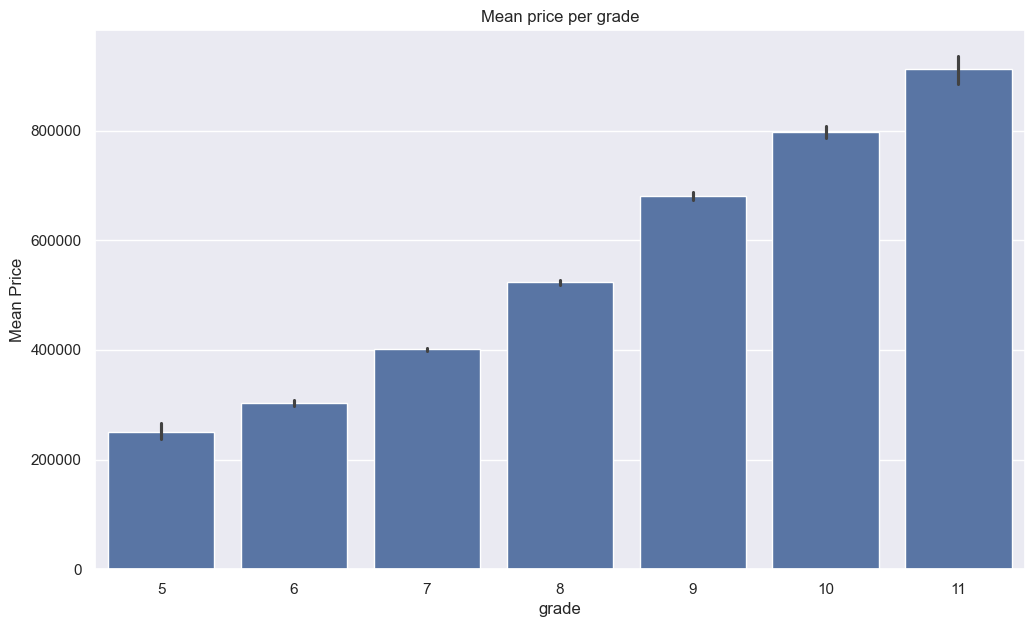

In [154]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='grade', y='price', estimator=np.mean)
plt.title("Mean price per grade")
plt.xlabel("grade")
plt.ylabel('Mean Price')
plt.show()

Cutting those low-represented grades earlier seems to pay off now. While this feature may not be as impactful as square footage, which is the main element for appreciating the value of a house, this feature will be determinant and must be included in the model as long as multicollinearity isn't as issue.

#### yr_built

In [155]:
print(f"range : {df.yr_built.min()} - {df.yr_built.max()}")

range : 1900 - 2015


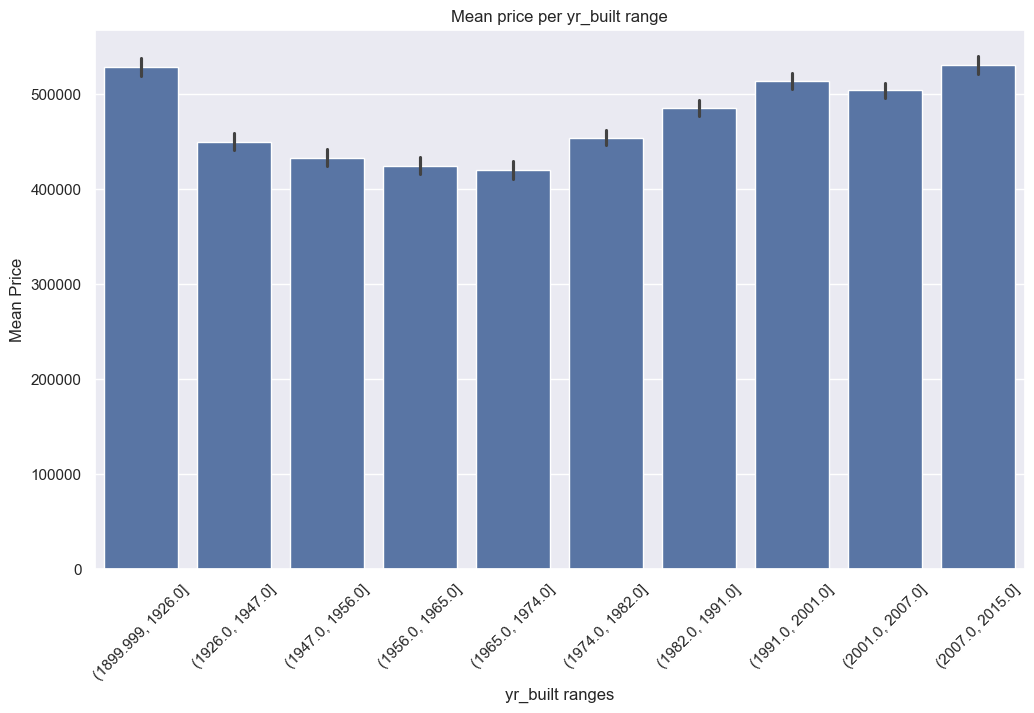

In [156]:
df['yr_built_bin'] = pd.qcut(df['yr_built'], q=10, duplicates='drop')

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='yr_built_bin', y='price', estimator=np.mean)
plt.title("Mean price per yr_built range")
plt.xlabel('yr_built ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

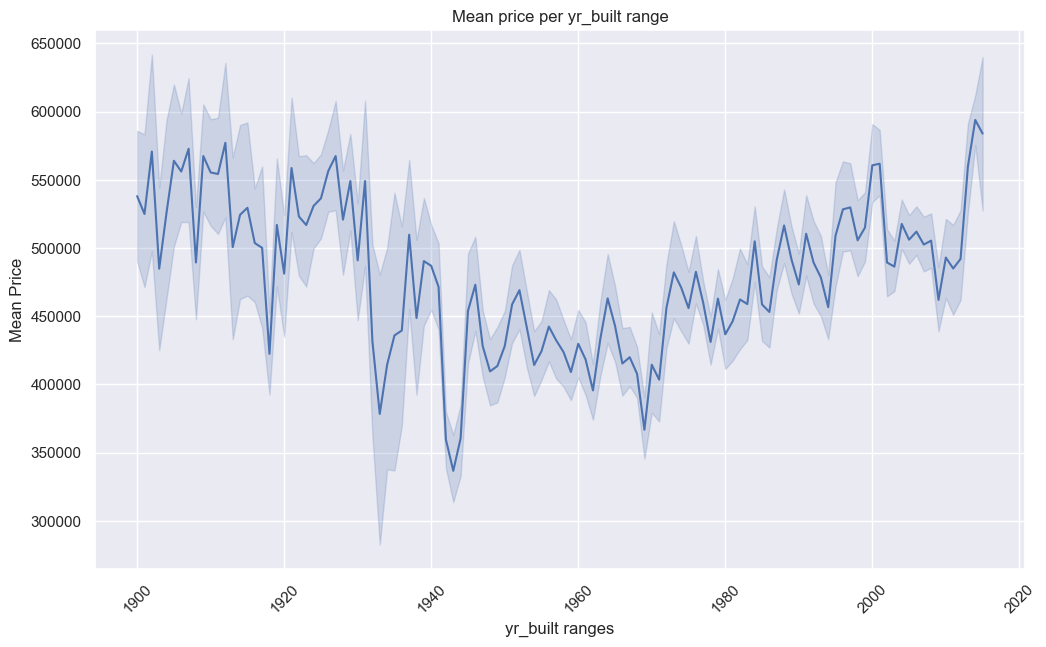

In [157]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='yr_built', y='price')
plt.title("Mean price per yr_built range")
plt.xlabel('yr_built ranges')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

Pretty low significance but it still looks usable, especially with most recently built houses

#### yr_renovated_classes

Reproducing a graph we made earlier and it's conclusion to validate the newly engineered feature from yr_renovated, the bivariate analysis with price has already been done in single feature analysis.

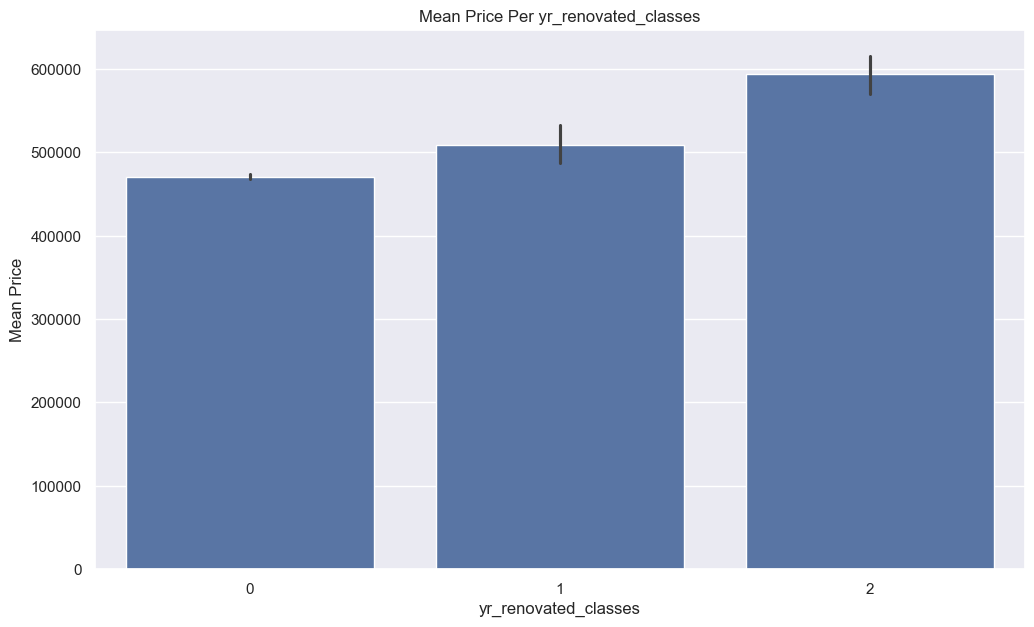

In [158]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='yr_renovated_classes', y='price')
plt.title("Mean Price Per yr_renovated_classes")
plt.xlabel('yr_renovated_classes')
plt.ylabel('Mean Price')
plt.show()

#### zipcode_class

zipcode_class has already been engineered and has good corelation results between price and it.

## Saving the cleaned dataset

In [161]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_bin,sqft_basement_class,bool_yr_renovated,yr_renovated_classes,zipcode_class,year,day,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,sqft_living_bin,sqft_lot_bin,sqft_above_bin,sqft_living15_bin,sqft_lot15_bin,yr_built_bin
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(-2.22, 222.0]",0,0,0,1,2014,13,False,False,False,False,False,False,False,False,False,True,False,False,"(1070.0, 1300.0]","(5471.4, 6562.4]","(783.0, 1196.0]","(1250.0, 1400.0]","(5497.8, 6588.0]","(1947.0, 1956.0]"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(222.0, 444.0]",1,1,1,2,2014,9,False,False,False,False,False,False,False,False,False,False,False,True,"(2280.0, 2570.0]","(6562.4, 7490.0]","(2022.0, 2435.0]","(1660.0, 1800.0]","(7503.0, 8181.8]","(1947.0, 1956.0]"


In [160]:
df.to_csv('data/cleaned_df.csv')